In [3]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(SPRING)
library(phyloseq)
library(NetCoMi)

In [4]:
# ggplot theme #
my_theme0 <- theme(panel.background = element_rect(fill = "transparent", 
                                                colour = NA), plot.background = element_rect(colour = 'NA', 
                                                                                             fill = 'transparent'),panel.grid.major=element_line(color=NA),
                axis.line=element_line(size=1.2,color="black"),
                axis.ticks=element_line(color="black"),
                axis.text=element_text(color="black",size=26),
                axis.title=element_text(color="black",size=30),
                panel.grid.minor = element_line(colour = NA),
                legend.text=element_text(size=17),legend.key=element_rect(fill="white"),
                legend.title=element_text(size=18,face="bold"),
                axis.text.x=element_text(angle=60,size=26,vjust=0.5),
                panel.border = element_rect(colour = "black", fill=NA, size=1),
                legend.position = "none")

my_theme1 <- theme_bw() + 
  theme(panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        text = element_text(size = 16),
        axis.title.x = element_text(size=18, color="black"), 
        axis.title.y = element_text(size=18, color="black"), 
        axis.text.x = element_text(angle = 0, hjust = 1, color="black"), 
        panel.grid.minor.x = element_line(colour = "grey", size=0.2, linetype = 'dashed'), 
        panel.grid.major.x = element_line(colour = "grey", size=0.2),
        panel.grid.minor.y = element_line(colour = "grey", size = 0.2, linetype = 'dashed'),
        panel.grid.major.y = element_line(colour = "grey", size=0.2),
        legend.position = "bottom", 
        legend.text=element_text(size=10), 
        legend.key.size = unit(1,"line"), 
        plot.margin=unit(c(1,1,1,1),"cm")
       ) 

In [5]:
# modified from https://www.biostars.org/p/455240/
metaphlanToPhyloseq <- function(
    tax,
    metadat=NULL,
    simplenames=TRUE,
    roundtointeger=FALSE,
    split="|"){
    ## tax is a matrix or data.frame with the table of taxonomic abundances, rows are taxa, columns are samples
    ## metadat is an optional data.frame of specimen metadata, rows are samples, columns are variables
    ## if simplenames=TRUE, use only the most detailed level of taxa names in the final object
    ## if roundtointeger=TRUE, values will be rounded to the nearest integer
    xnames = rownames(tax)
    shortnames = gsub(paste0(".+\\", split), "", xnames)
    if(simplenames){
        rownames(tax) = shortnames
    }
    if(roundtointeger){
        tax = round(tax * 1e4)
    }
    x2 = strsplit(xnames, split=split, fixed=TRUE)
    taxmat = matrix(NA, ncol=max(sapply(x2, length)), nrow=length(x2))
    colnames(taxmat) = c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species", "Strain")[1:ncol(taxmat)]
    rownames(taxmat) = rownames(tax)
    for (i in 1:nrow(taxmat)){
        taxmat[i, 1:length(x2[[i]])] <- x2[[i]]
    }
    taxmat = gsub("[a-z]__", "", taxmat)
    taxmat = phyloseq::tax_table(taxmat)
    otutab = phyloseq::otu_table(tax, taxa_are_rows=TRUE)
    if(is.null(metadat)){
        res = phyloseq::phyloseq(taxmat, otutab)
    }else{
        res = phyloseq::phyloseq(taxmat, otutab, phyloseq::sample_data(metadat))
    }
    return(res)
}

In [7]:
merged_metaphlan_tbl <- "/home/shengwei/VirEncAct/@@DEF_Visualization/plot_bioGEOTRACES/merged_MetaPhlAn3_BioGEOTRACES_abundance_table.tab"
merged_metaphlan_df <- read.table(merged_metaphlan_tbl, header = T, row.names=1, sep = "\t", as.is = T, strip.white=T, stringsAsFactors = F)
merged_metaphlan_df <- merged_metaphlan_df[, -which(colnames(merged_metaphlan_df) == "NCBI_tax_id")] # remove NCBI_tax_id column
head(merged_metaphlan_df, 4)
#colnames(merged_metaphlan_df)

SRR6507280 
UNKNOWN                                                                                 99.64535000
k__Archaea                                                                               0.03269634
k__Archaea|p__Candidatus_Heimdallarchaeota                                               0.00000000
k__Archaea|p__Candidatus_Heimdallarchaeota|c__Candidatus_Heimdallarchaeota_unclassified  0.00000000
                                                                                        SRR6507279
UNKNOWN                                                                                 98.25117  
k__Archaea                                                                               0.00000  
k__Archaea|p__Candidatus_Heimdallarchaeota                                               0.00000  
k__Archaea|p__Candidatus_Heimdallarchaeota|c__Candidatus_Heimdallarchaeota_unclassified  0.00000  
                                                                                        SRR6507278 
UNKNOWN                                                                                 99.06114000
k__Archaea                                                                               0.01835311
k__Archaea|p__Candidatus_Heimdallarchaeota                                               0.00000000
k__Archaea|p__Candidatus_Heimdallarchaeota|c__Candidatus_Heimdallarchaeota_unclassified  0.00000000
                                                                                        SRR6507277
UNKNOWN                                                                                 97.96894  
k__Archaea                                                                               0.00000  
k__Archaea|p__Candidatus_Heimdallarchaeota                                               0.00000  
k__Archaea|p__Candidatus_Heimdallarchaeota|c__Candidatus_Heimdallarchaeota_unclassified  0.00000  
                                                                                        SRR5788468
UNKNOWN                                                                                 99.31169  
k__Archaea                                                                               0.00000  
k__Archaea|p__Candidatus_Heimdallarchaeota                                               0.00000  
k__Archaea|p__Candidatus_Heimdallarchaeota|c__Candidatus_Heimdallarchaeota_unclassified  0.00000  
                                                                                        SRR5788467
UNKNOWN                                                                                 99.1026600
k__Archaea                                                                               0.6815456
k__Archaea|p__Candidatus_Heimdallarchaeota                                               0.0000000
k__Archaea|p__Candidatus_Heimdallarchaeota|c__Candidatus_Heimdallarchaeota_unclassified  0.0000000
                                                                                        SRR5788466
UNKNOWN                                                                                 97.47057  
k__Archaea                                                                               0.00000  
k__Archaea|p__Candidatus_Heimdallarchaeota                                               0.00000  
k__Archaea|p__Candidatus_Heimdallarchaeota|c__Candidatus_Heimdallarchaeota_unclassified  0.00000  
                                                                                        SRR5788465
UNKNOWN                                                                                 96.9029   
k__Archaea                                                                               0.0000   
k__Archaea|p__Candidatus_Heimdallarchaeota                                               0.0000   
k__Archaea|p__Candidatus_Heimdallarchaeota|c__Candidatus_Heimdallarchaeota_unclassified  0.0000   
                                                                                        SRR5788464  
UNKNOWN          

In [36]:
metadata_file <- "/home/shengwei/VirEncAct/@@DEF_Visualization/plot_bioGEOTRACES/biogeotraces_metadata_v2.tsv"
metadata_df <- read.table(metadata_file, header = T, sep = "\t", as.is = T, stringsAsFactors = F)
rownames(metadata_df) <- metadata_df$NCBI_SRA_Acc
head(metadata_df, 2)
unique(metadata_df$Cruise_Series)
unique(metadata_df$GEOTRACES_Section)
unique(metadata_df$Cruise_ID)

Sample_Name Sample_ID Cruise_Series GEOTRACES_Section Cruise_ID
SRR5788236 SRZ187206   S0001     GEOTRACES     GA02              PE319    
SRR5788235 SRZ187207   S0002     GEOTRACES     GA02              PE319    
           Cruise_Station Collection_Date Collection_Year Collection_Month
SRR5788236 10             5/10/2010       2010            5               
SRR5788235 10             5/10/2010       2010            5               
           Collection_Time ⋯ Longitude Bottle_ID NCBI_BioPrj NCBI_SRA_Study
SRR5788236 12:13:00        ⋯ -42.4467  631397    PRJNA385854 SRP110813     
SRR5788235 12:13:00        ⋯ -42.4467  631391    PRJNA385854 SRP110813     
           NCBI_BioSample NCBI_SRA_Acc Total_Read_Pairs Total_Bases
SRR5788236 SAMN07136483   SRR5788236   20058749         6017624700 
SRR5788235 SAMN07136484   SRR5788235   29418997         8825699100 
           NCBI_SRA_Accession_Contigs Assembly_Method  
SRR5788236 SRZ187206                  metaSPAdes v3.9.0
SRR5788235 SRZ187207                  metaSPAdes v3.9.0

[1] "GEOTRACES" "HOT"       "BATS"

[1] "GA02" "GA03" "GP13" "GA10" "HOT"  "BATS"

[1] "PE319"   "PE321"   "KN204"   "JC057"   "KN199-4" "TAN1109" "SS2011" 
 [8] "D357"    "HOT156"  "HOT158"  "HOT159"  "HOT160"  "HOT162"  "HOT163" 
[15] "HOT164"  "HOT165"  "HOT166"  "HOT144"  "HOT145"  "HOT146"  "HOT147" 
[22] "HOT148"  "HOT149"  "HOT150"  "HOT151"  "HOT153"  "HOT154"  "HOT152" 
[29] "HOT155"  "HOT157"  "BATS175" "BATS181" "BATS184" "BATS186" "BATS195"
[36] "BATS173" "BATS174" "BATS178" "BATS179" "BATS187" "BATS192" "BATS193"
[43] "BATS194" "BATS176" "BATS182" "BATS183" "BATS188" "BATS189" "BATS191"
[50] "BATS185" "HOT214"  "HOT216"  "BATS248" "BATS252"

In [9]:
ps <- metaphlanToPhyloseq(merged_metaphlan_df, metadat=metadata_df)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 479 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 479 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 283 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 283 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 111 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 111 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”


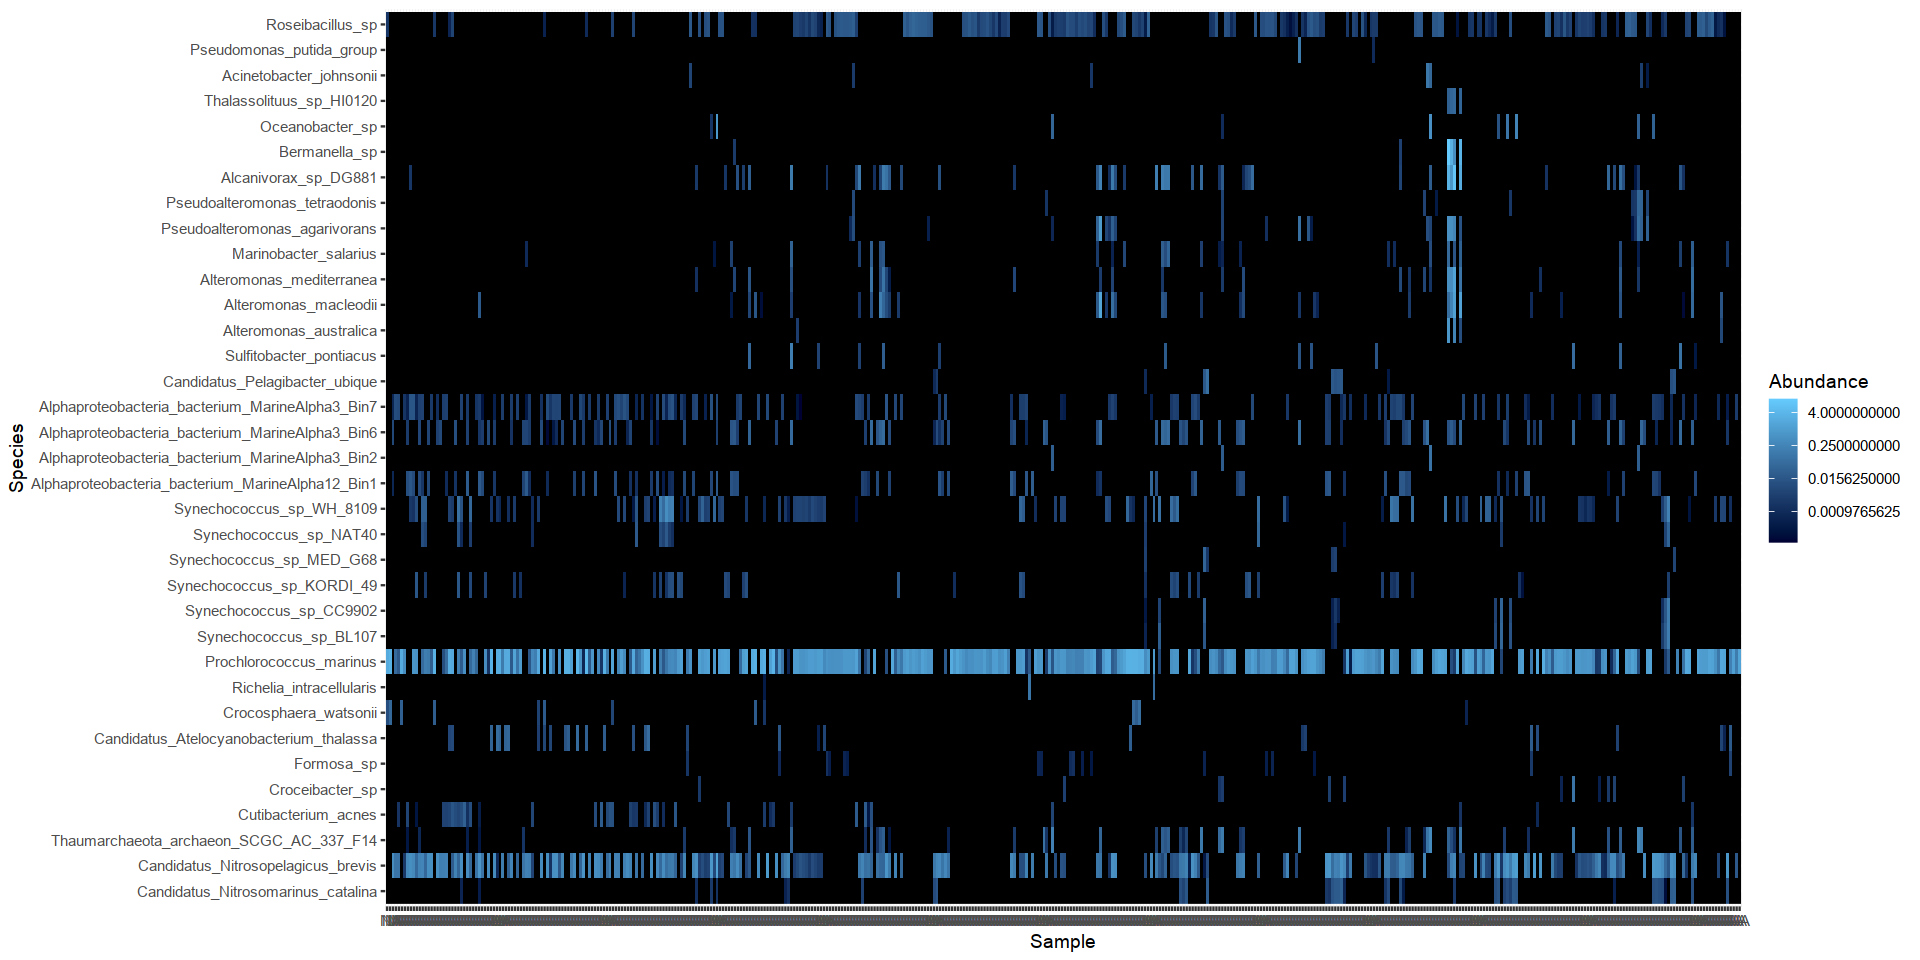

In [103]:
options(repr.plot.width=16, repr.plot.height=8)

# select all prokaryotes
ps.prok <- subset_taxa(ps, Kingdom %in% c("Bacteria", "Archaea"))
ps.prok

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.prok.species <- subset_taxa(ps.prok, !is.na(Species))
ps.prok.species

# keep only species with sum abundance >= 1e-1 across samples
ps.prok.species.fil <- prune_taxa(taxa_sums(ps.prok.species) >= 0.1, ps.prok.species)
# keep only samples with sum abundance >= 1e-1 across taxa
ps.prok.species.fil <- prune_samples(sample_sums(ps.prok.species.fil) >= 0.1, ps.prok.species.fil)

plot_heatmap(ps.prok.species.fil,
             taxa.label="Species", 
             taxa.order="Species",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))

In [104]:
plot_net(laymeth='list')

[1] "auto"                      "random"                   
 [3] "circle"                    "sphere"                   
 [5] "fruchterman.reingold"      "kamada.kawai"             
 [7] "spring"                    "reingold.tilford"         
 [9] "fruchterman.reingold.grid" "lgl"                      
[11] "graphopt"                  "svd"

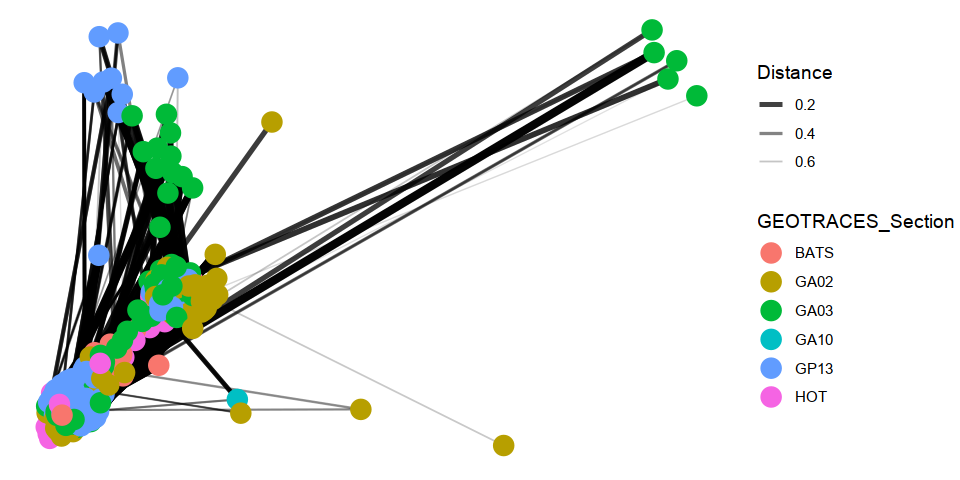

In [105]:
options(repr.plot.width=8, repr.plot.height=4)

plot_net(physeq=ps.prok.species.fil,
         distance="bray", 
         laymeth="fruchterman.reingold", 
         color="GEOTRACES_Section")

## NetCoMi

- [Github Link](https://github.com/stefpeschel/NetCoMi)

In [128]:
library(NetCoMi)

#### Single network with SPRING as association measure

We firstly construct a single association network using the `SPRING` approach for estimating associations (conditional dependence) between OTUs.

The data are filtered within `netConstruct()` as follows:

    - Only samples with a total number of reads of at least 1000 are included (argument filtSamp).
    - Only the 100 taxa with highest frequency are included (argument filtTax).

`measure` defines the association or dissimilarity measure, which is "spring" in our case. Additional arguments are passed to SPRING() via `measurePar`. `nlambda` and `rep.num` are set to 10 for a decreased execution time, but should be higher for real data.

Normalization as well as zero handling is performed internally in `SPRING()`. Hence, we set `normMethod` and `zeroMethod` to "none". We furthermore set `sparsMethod` to "none" because `SPRING` returns a sparse network where no additional sparsification step is necessary. We use the “signed” method for transforming associations into dissimilarities (argument `dissFunc`). In doing so, strongly negatively associated taxa have a high dissimilarity and, in turn, a low similarity, which corresponds to edge weights in the network plot. 

In [106]:
net_single_prok <- netConstruct(ps.prok.species.fil,
                           filtTax = "highestFreq",
                           filtTaxPar = list(highestFreq = 100),
                           filtSamp = "totalReads",
                           filtSampPar = list(totalReads = 0.01),
                           measure = "spring", # "pearson",
                           measurePar = list(nlambda=10, 
                                             rep.num=10),
                           normMethod = "clr", 
                           zeroMethod = "multRepl",
                           sparsMethod = "threshold", 
                           thresh = 0.3,
                           dissFunc = "signed",
                           verbose = 3,
                           seed = 123456)

Infos about changed arguments:

Zero handling included in 'spring'.
Normalization ignored for measure 'spring'.
Sparsification included in 'spring'.


Data filtering ...

35 taxa and 456 samples remaining.


Calculate 'spring' associations ... 




The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann grap

Done.



#### Analyzing the constructed network

NetCoMi’s `netAnalyze()` function is used for analyzing the constructed network(s).

Here, `centrLCC` is set to TRUE meaning that centralities are calculated only for nodes in the largest connected component (LCC). Clusters are identified using greedy modularity optimization (by `cluster_fast_greedy()` from igraph package). Hubs are nodes with an eigenvector centrality value above the empirical 95% quantile of all eigenvector centralities in the network (argument `hubPar`). `weightDeg` and `normDeg` are set to FALSE so that the degree of a node is simply defined as number of nodes that are adjacent to the node.

In [107]:
props_single_prok <- netAnalyze(net_single_prok, 
                           centrLCC = TRUE,
                           avDissIgnoreInf = TRUE,
                           sPathNorm = FALSE,
                           clustMethod = "cluster_fast_greedy",
                           hubPar = "eigenvector", # hubPar = c("degree", "between", "closeness"),
                           hubQuant = 0.9,
                           lnormFit = TRUE,
                           weightDeg = FALSE, 
                           normBetw = FALSE,
                           normClose = FALSE,
                           normEigen = FALSE,
                           normDeg = FALSE)

#?summary.microNetProps
summary(props_single_prok, numbNodes = 5L)


Component sizes
```````````````          
size: 34 1
   #:  1 1
______________________________
Global network properties
`````````````````````````
Largest connected component (LCC):
                                 
Relative LCC size         0.97143
Clustering coefficient    0.19694
Moduarity                 0.47722
Positive edge percentage 71.92982
Edge density              0.10160
Natural connectivity      0.03938
Vertex connectivity       1.00000
Edge connectivity         1.00000
Average dissimilarity*    0.66630
Average path length**     2.15815

Whole network:
                                 
Number of components      2.00000
Clustering coefficient    0.19694
Moduarity                 0.47722
Positive edge percentage 71.92982
Edge density              0.09580
Natural connectivity      0.03800

 *Dissimilarity = 1 - edge weight
**Path length: Sum of dissimilarities along the path

______________________________
Clusters
- In the whole network
- Algorithm: cluster_fast_greedy
````

#### Visualizing the network

We use the determined clusters as node colors and scale the node sizes according to the node’s eigenvector centrality.

Note that edge weights are (non-negative) similarities, however, the edges belonging to negative estimated associations are colored in red by default (negDiffCol = TRUE).

By default, a different transparency value is added to edges with an absolute weight below and above the cut value (arguments `edgeTranspLow` and `edgeTranspHigh`). The determined cut value can be read out as follows:
`p$q1$Arguments$cut`

Let’s improve the visualization a bit by changing the following arguments:
    - repulsion = 0.8: Place the nodes further apart
    - rmSingles = TRUE: Single nodes are removed
    - labelScale = FALSE and cexLabels = 1.6: All labels have equal size and are enlarged to improve readability of small node’s labels
    - nodeSizeSpread = 3 (default is 4): Node sizes are more similar if the value is decreased. This argument (in combination with cexNodes) is useful to enlarge small nodes while keeping the size of big nodes.


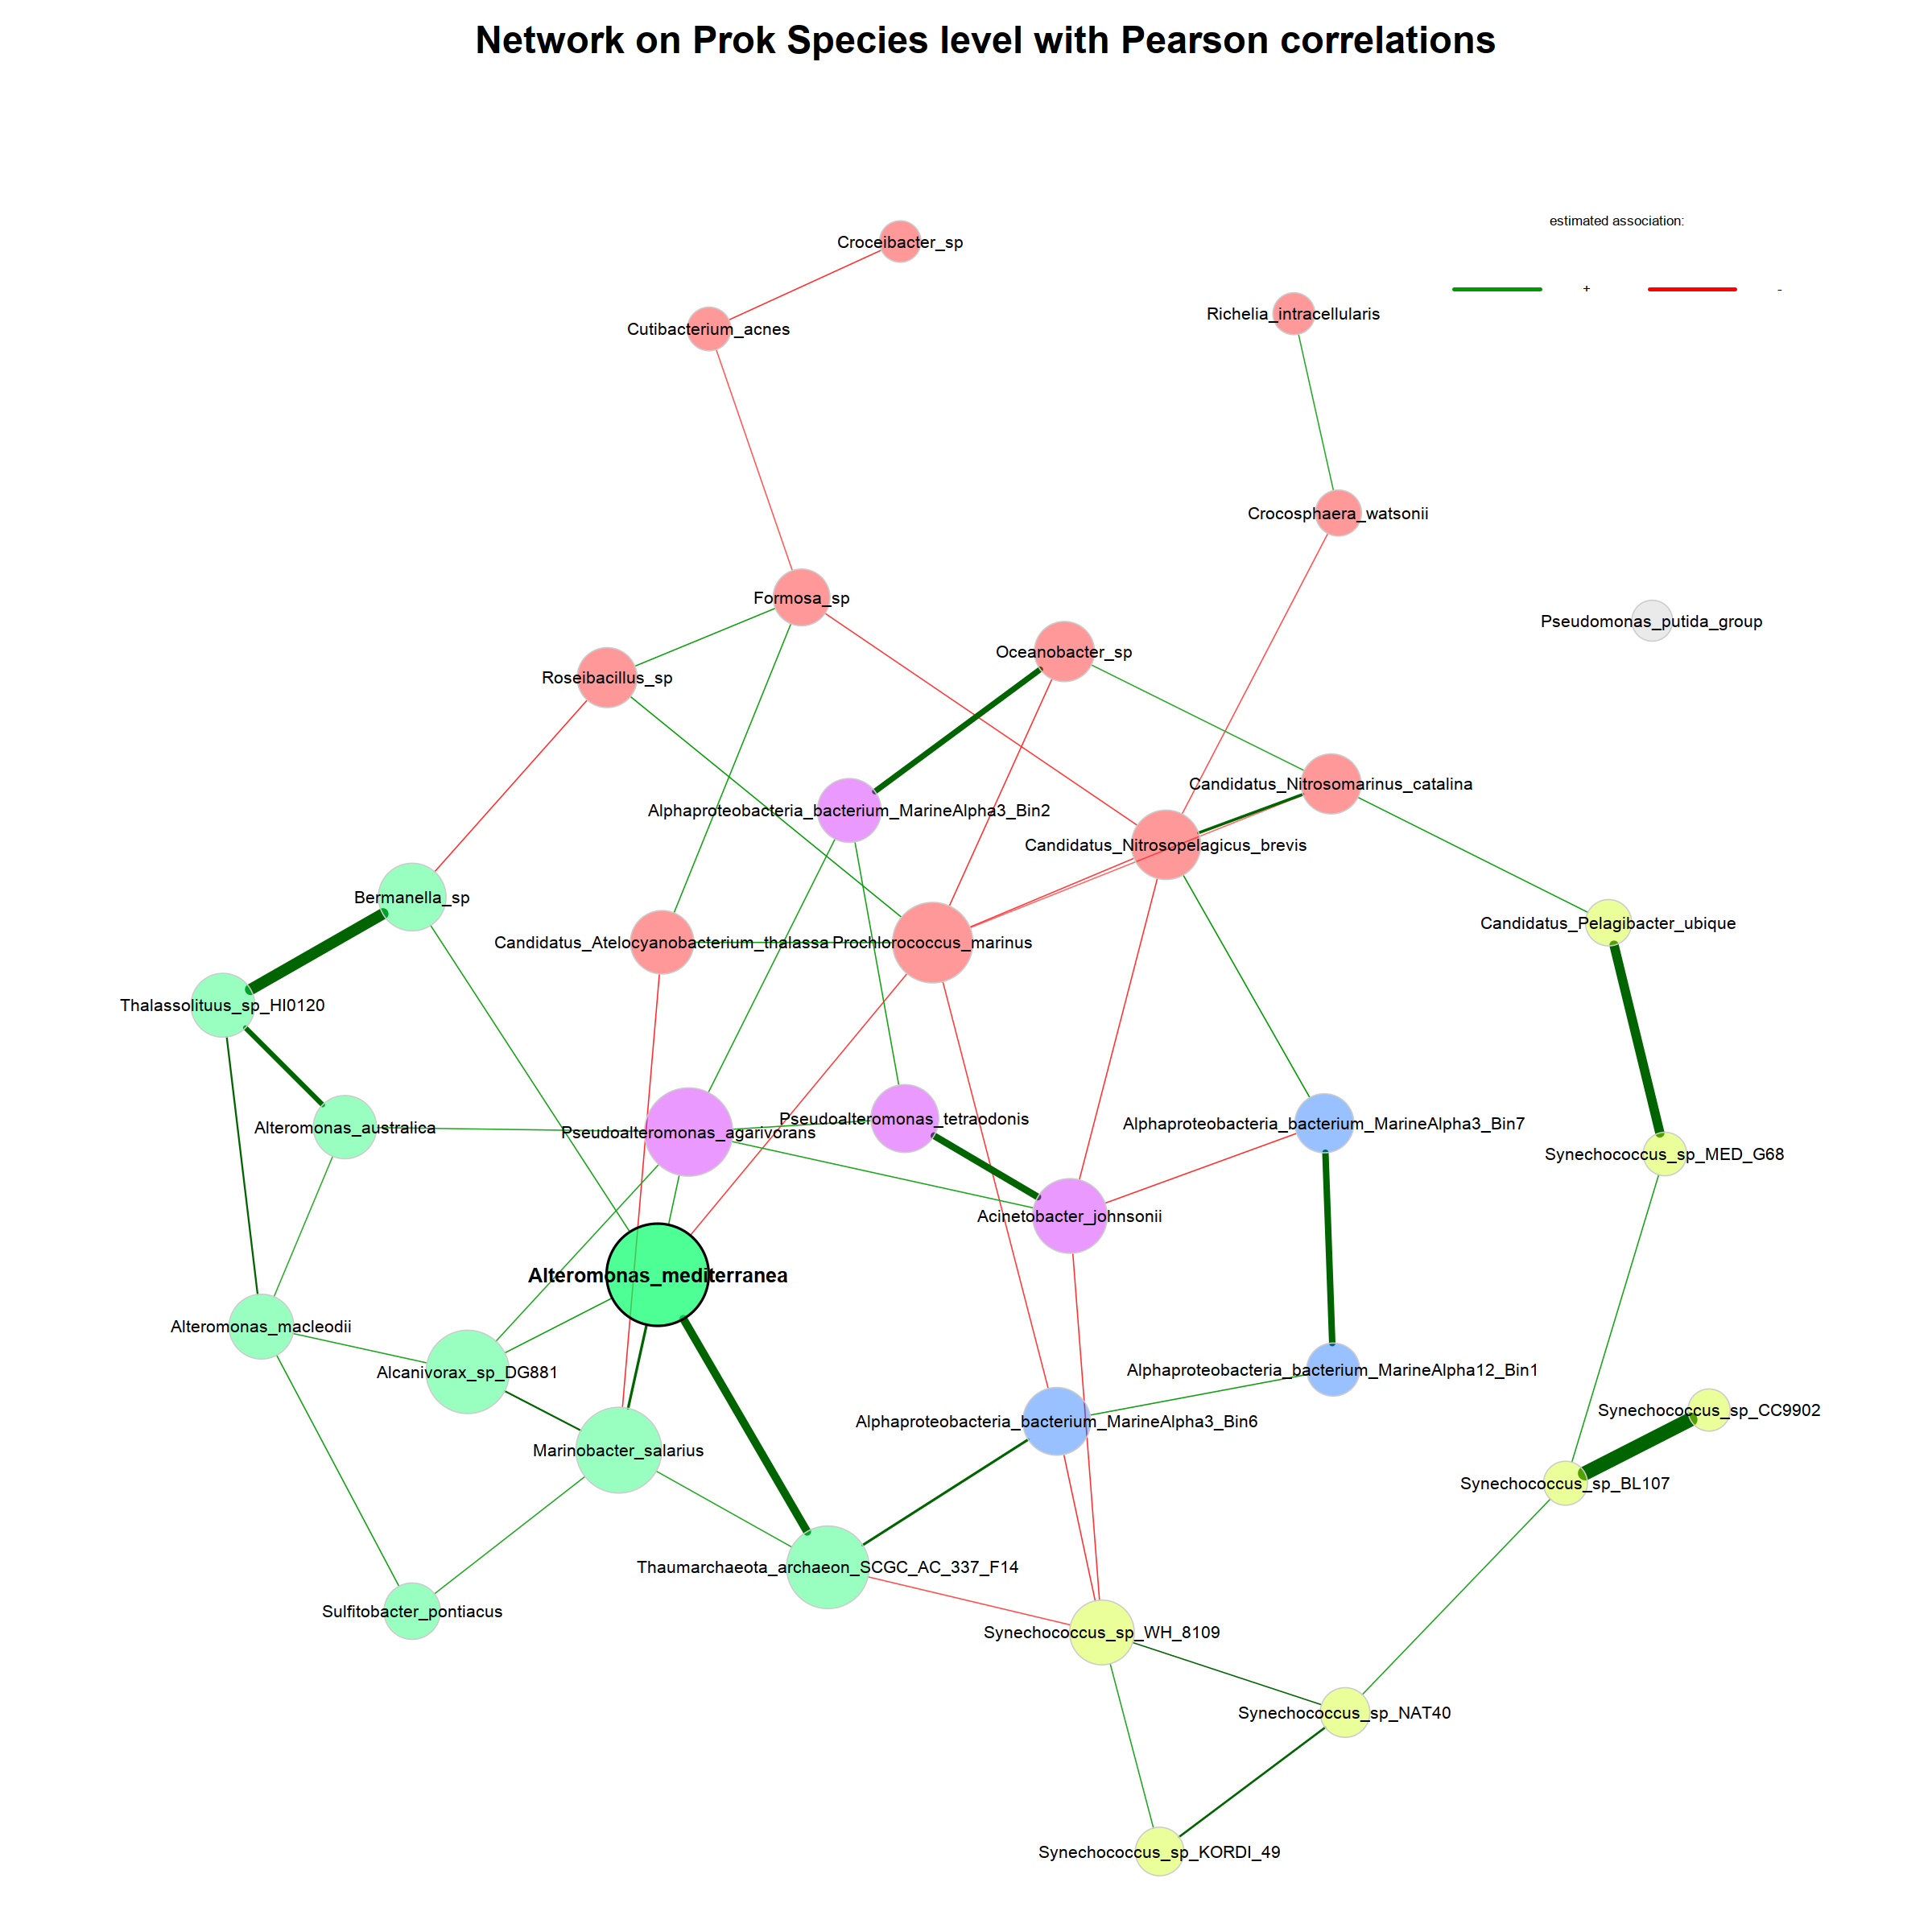

In [126]:
options(repr.plot.width=20, repr.plot.height=20)

p_prok <- plot(props_single_prok,
          layout = "layout_with_fr",
          labelScale = FALSE,
          rmSingles = FALSE,
          shortenLabels = "simple",
          labelLength = 50,
          charToRm = "s__",
          nodeColor = "cluster", 
          nodeSize = "eigenvector", # clr
          nodeSizeSpread = 3,
          hubBorderCol = "black",
          repulsion = 0.8,
          cexNodes = 2,
          cexLabels = 1,
          cexHubLabels = 1.2,
          title1 = "Network on Prok Species level with Pearson correlations", 
          showTitle = TRUE,
          cexTitle = 2.3, 

         )

legend(0.6, 1.1, cex = 0.8, title = "estimated association:",
       legend = c("+","-"), lty = 1, lwd = 3, col = c("#009900","red"), 
       bty = "n", horiz = TRUE)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 188 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 188 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 41 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 41 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


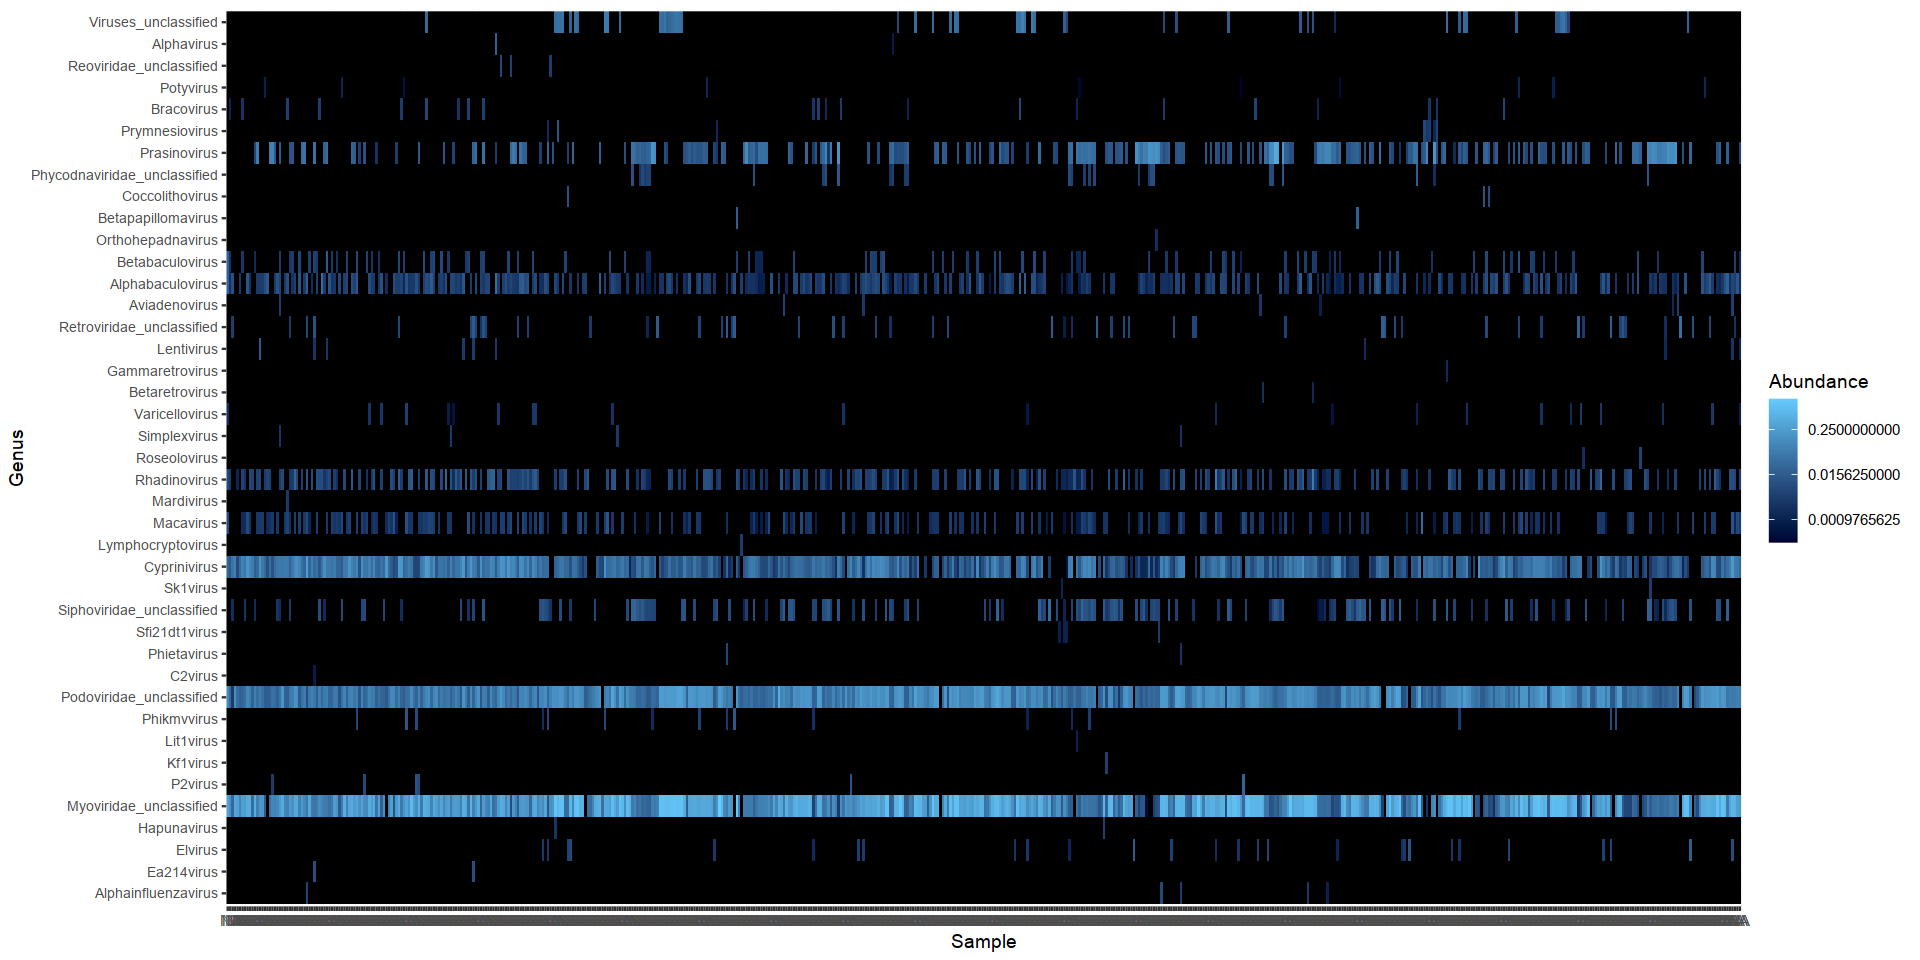

In [77]:
options(repr.plot.width=16, repr.plot.height=8)

# select all viruses
ps.vir <- subset_taxa(ps, Kingdom == "Viruses")
ps.vir

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.vir.genus <- subset_taxa(ps.vir, is.na(Species) & !is.na(Genus))
ps.vir.genus

plot_heatmap(ps.vir.genus,
             taxa.label="Genus", 
             taxa.order="Genus",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))

ggsave(filename="BioGEOTRACES_MetaPhlAn3_Viruses_by_Genus.pdf", 
       plot = last_plot(), path="./", 
       scale = 1, width = 400, height = 200, units = "mm",
       dpi = 300, limitsize = FALSE)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 188 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 188 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 120 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 120 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


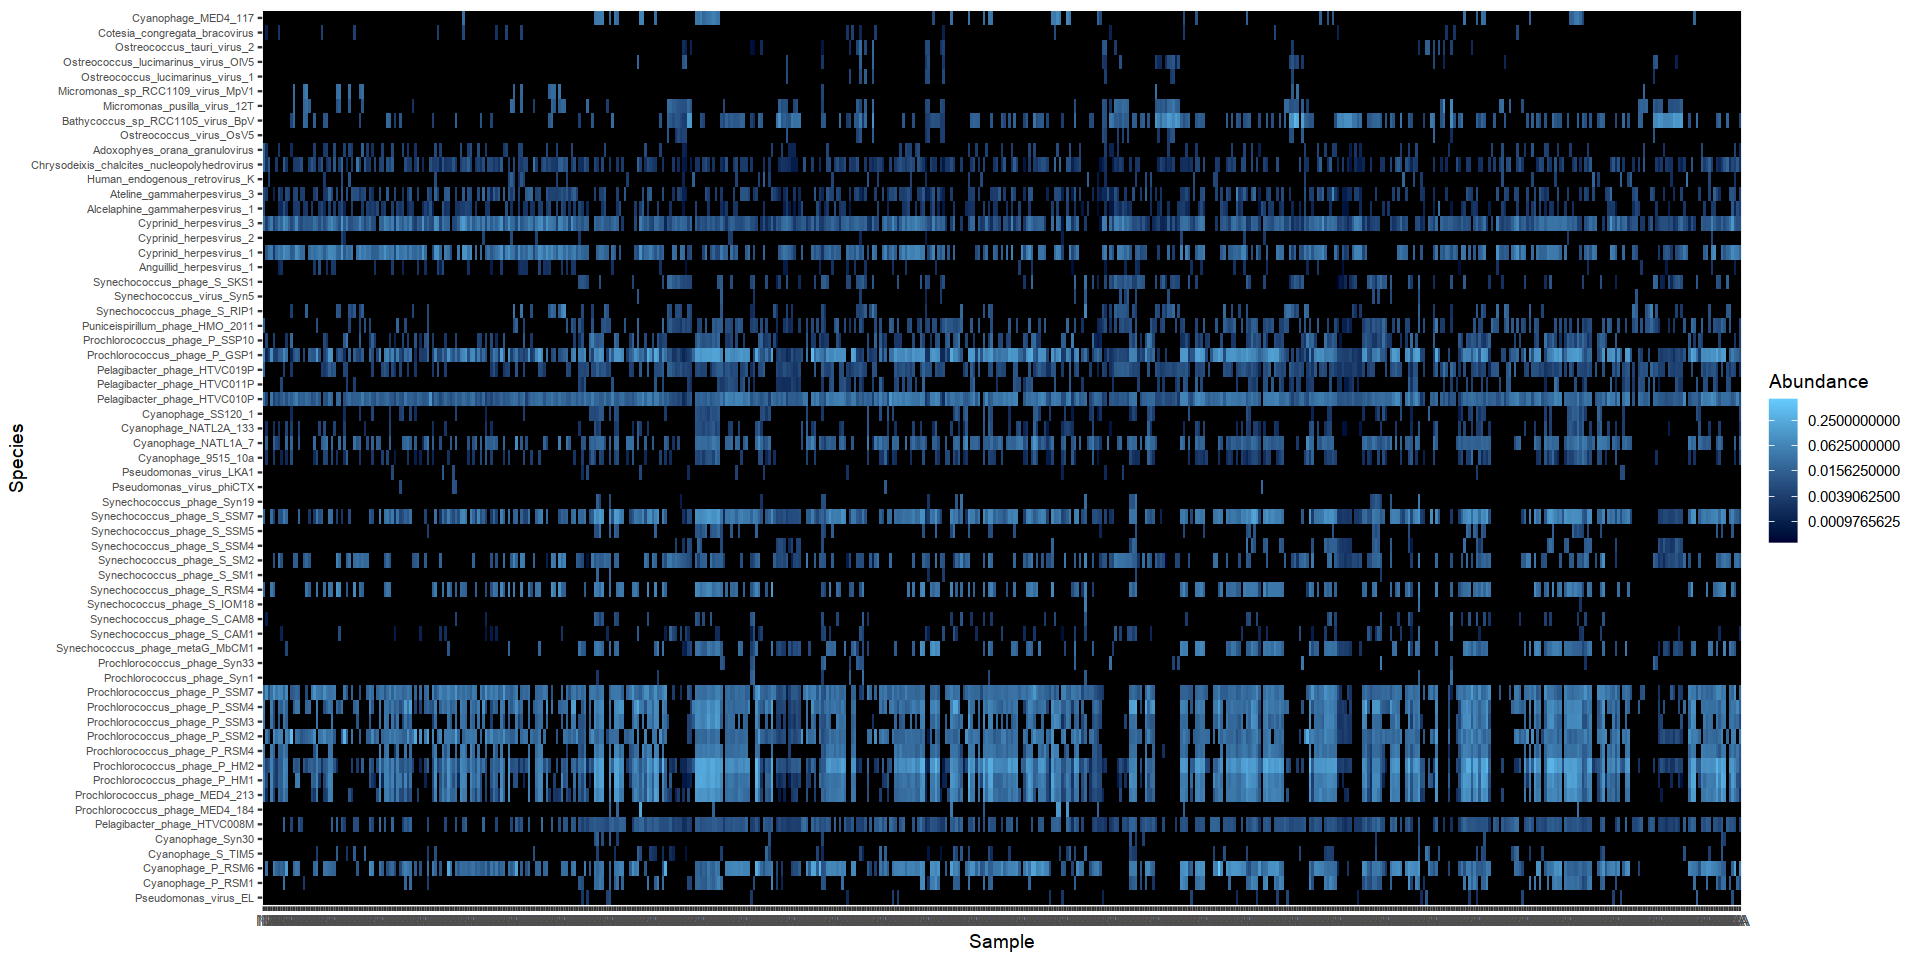

In [95]:
options(repr.plot.width=16, repr.plot.height=8)

# select all viruses
ps.vir <- subset_taxa(ps, Kingdom == "Viruses")
ps.vir

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.vir.species <- subset_taxa(ps.vir, !is.na(Species))
ps.vir.species

# keep only species with sum abundance >= 1e-1 across samples
ps.vir.species.fil <- prune_taxa(taxa_sums(ps.vir.species) >= 0.05, ps.vir.species)
# keep only samples with sum abundance >= 1e-1 across taxa
ps.vir.species.fil <- prune_samples(sample_sums(ps.vir.species.fil) >= 0.05, ps.vir.species.fil)

plot_heatmap(ps.vir.species.fil,
             taxa.label="Species", 
             taxa.order="Species",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))

ggsave(filename="BioGEOTRACES_MetaPhlAn3_Viruses_by_Species.pdf", 
       plot = last_plot(), path="./", 
       scale = 1, width = 400, height = 200, units = "mm",
       dpi = 300, limitsize = FALSE)

In [96]:
net_single_vir <- netConstruct(ps.vir.species.fil,
                           filtTax = "highestFreq",
                           filtTaxPar = list(highestFreq = 100),
                           filtSamp = "totalReads",
                           filtSampPar = list(totalReads = 0.01),
                           measure = "spring", # "pearson",
                           measurePar = list(nlambda=10, 
                                             rep.num=10),
                           normMethod = "clr", 
                           zeroMethod = "multRepl",
                           sparsMethod = "threshold", 
                           thresh = 0.3,
                           dissFunc = "signed",
                           verbose = 3,
                           seed = 123456)

Infos about changed arguments:

Zero handling included in 'spring'.
Normalization ignored for measure 'spring'.
Sparsification included in 'spring'.


Data filtering ...

61 taxa and 585 samples remaining.


Calculate 'spring' associations ... 




The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann grap

Done.



In [97]:
props_single_vir <- netAnalyze(net_single_vir, 
                           centrLCC = TRUE,
                           avDissIgnoreInf = TRUE,
                           sPathNorm = FALSE,
                           clustMethod = "cluster_fast_greedy",
                           hubPar = "eigenvector", # hubPar = c("degree", "between", "closeness"),
                           hubQuant = 0.9,
                           lnormFit = TRUE,
                           weightDeg = FALSE, 
                           normBetw = FALSE,
                           normClose = FALSE,
                           normEigen = FALSE,
                           normDeg = FALSE)

#?summary.microNetProps
summary(props_single_vir, numbNodes = 5L)


Component sizes
```````````````          
size: 60 1
   #:  1 1
______________________________
Global network properties
`````````````````````````
Largest connected component (LCC):
                                 
Relative LCC size         0.98361
Clustering coefficient    0.20570
Moduarity                 0.47578
Positive edge percentage 79.13669
Edge density              0.07853
Natural connectivity      0.02271
Vertex connectivity       1.00000
Edge connectivity         1.00000
Average dissimilarity*    0.68034
Average path length**     2.07757

Whole network:
                                 
Number of components      2.00000
Clustering coefficient    0.20570
Moduarity                 0.47578
Positive edge percentage 79.13669
Edge density              0.07596
Natural connectivity      0.02225

 *Dissimilarity = 1 - edge weight
**Path length: Sum of dissimilarities along the path

______________________________
Clusters
- In the whole network
- Algorithm: cluster_fast_greedy
````

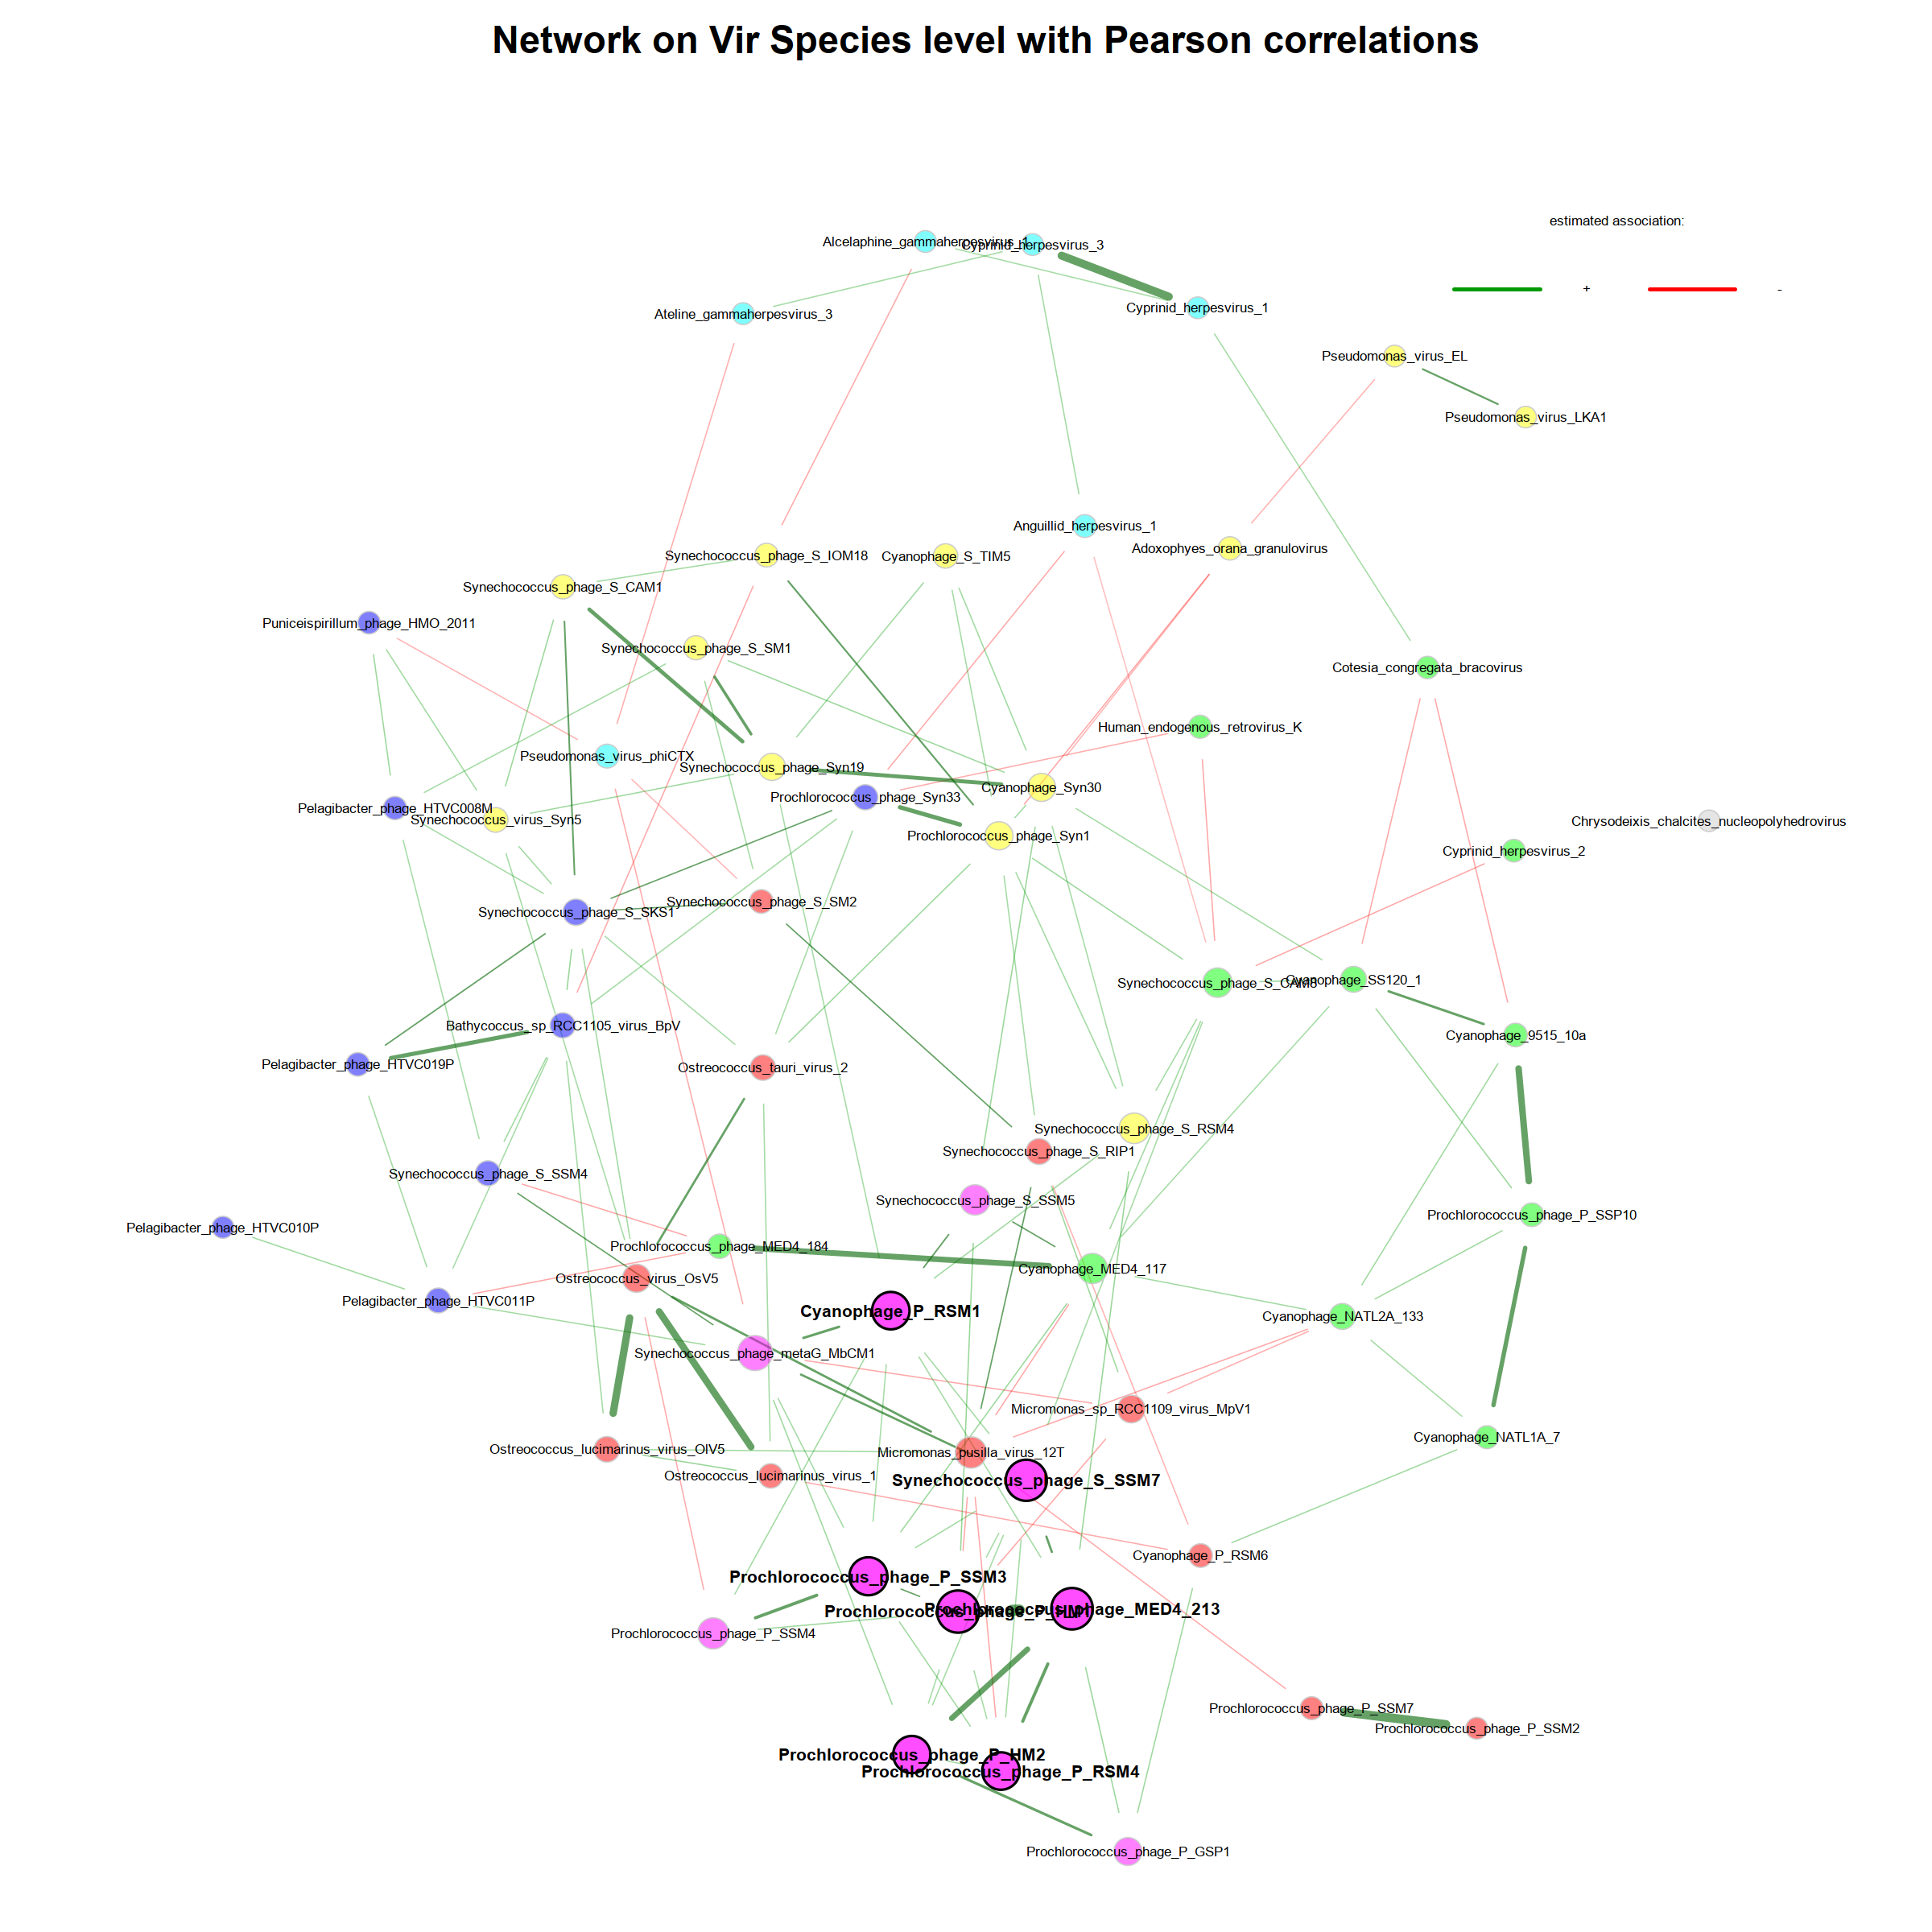

In [147]:
options(repr.plot.width=20, repr.plot.height=20)

p_vir <- plot(props_single_vir,
          layout = "layout_with_fr",
          labelScale = FALSE,
          rmSingles = FALSE,
          shortenLabels = "simple",
          labelLength = 50,
          charToRm = "s__",
          nodeColor = "cluster", 
          nodeSize = "eigenvector", # clr
          nodeSizeSpread = 3,
          hubBorderCol = "black",
          repulsion = 0.8,
          cexNodes = 3,
          cexLabels = 0.8,
          cexHubLabels = 1,
          title1 = "Network on Vir Species level with Pearson correlations", 
          showTitle = TRUE,
          cexTitle = 2.3, 
          edgeTranspLow = 60, 
          edgeTranspHigh = 40,
          nodeTransp = 50, 
          hubTransp = 30
         )


legend(0.6, 1.1, cex = 0.8, title = "estimated association:",
       legend = c("+","-"), lty = 1, lwd = 3, col = c("#009900","red"), 
       bty = "n", horiz = TRUE)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 471 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 471 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 231 taxa and 610 samples ]
sample_data() Sample Data:       [ 610 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 231 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”


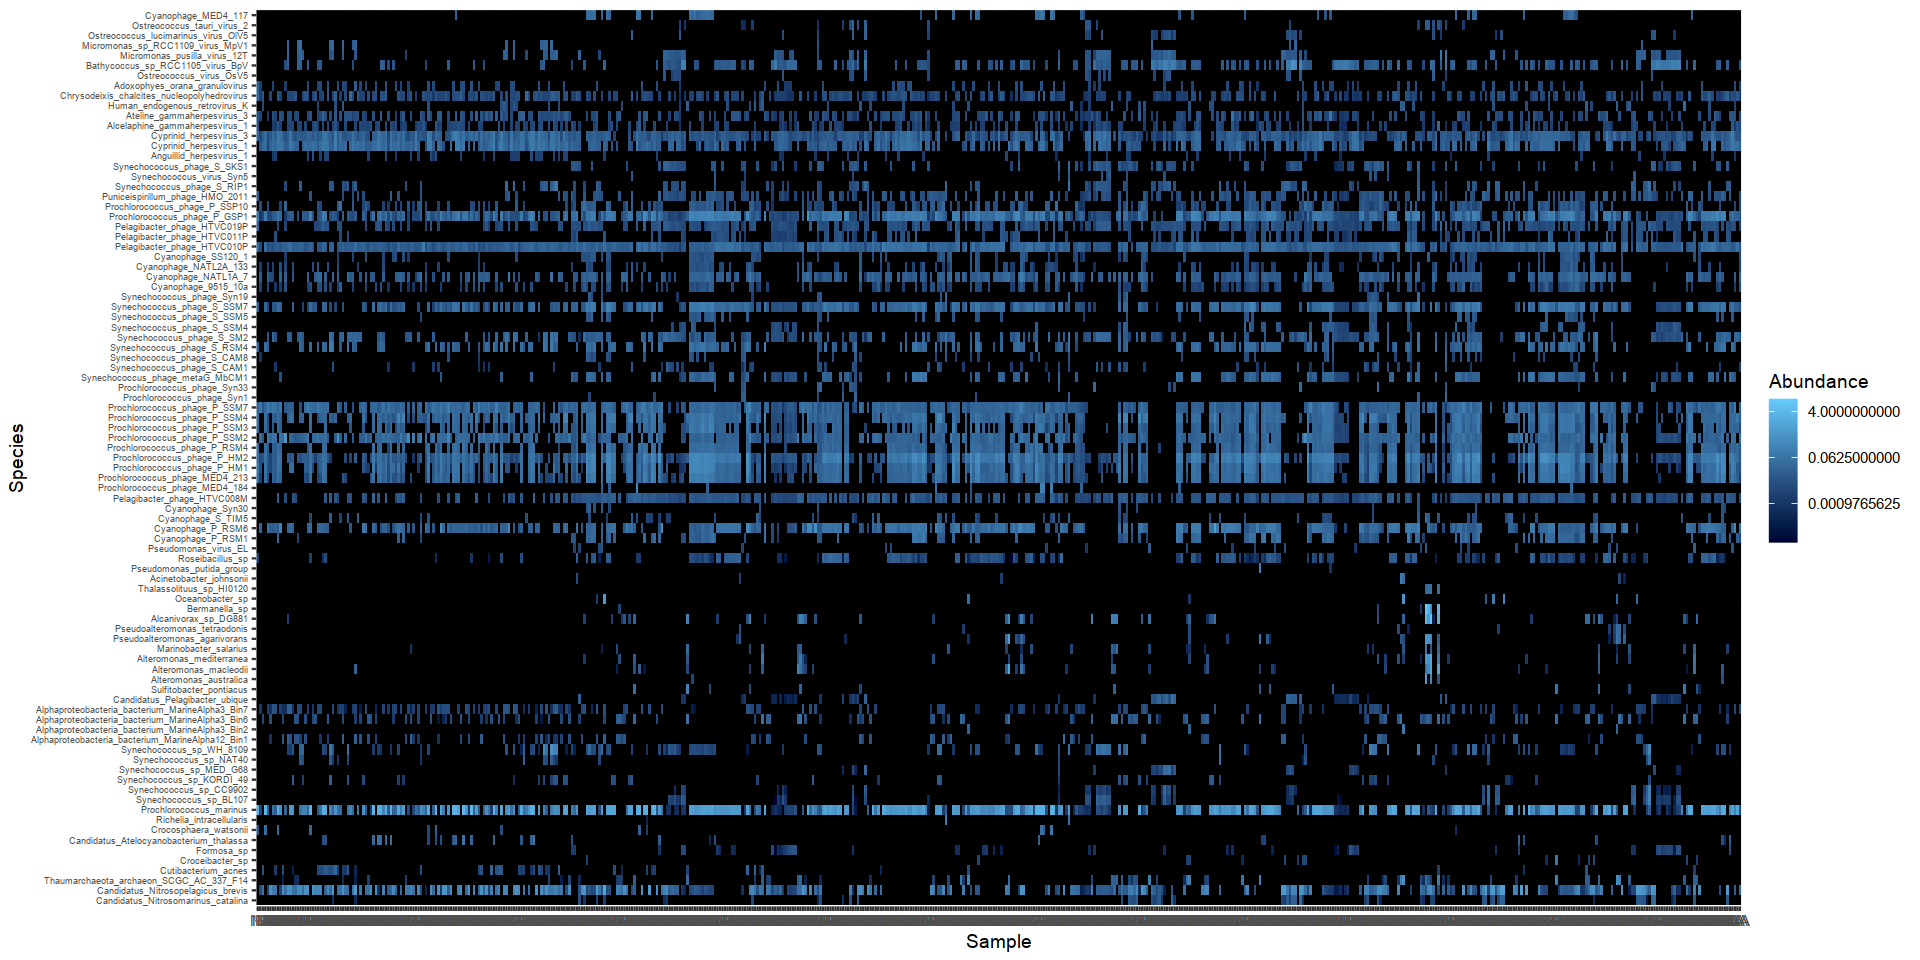

In [130]:
options(repr.plot.width=16, repr.plot.height=8)

# select all prokaryotes
ps.VirProk <- subset_taxa(ps, Kingdom %in% c("Bacteria", "Archaea", "Viruses"))
ps.VirProk

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.VirProk.species <- subset_taxa(ps.VirProk, !is.na(Species))
ps.VirProk.species

# keep only species with sum abundance >= 1e-1 across samples
ps.VirProk.species.fil <- prune_taxa(taxa_sums(ps.VirProk.species) >= 0.1, ps.VirProk.species)
# keep only samples with sum abundance >= 1e-1 across taxa
ps.VirProk.species.fil <- prune_samples(sample_sums(ps.VirProk.species.fil) >= 0.1, ps.VirProk.species.fil)

plot_heatmap(ps.VirProk.species.fil,
             taxa.label="Species", 
             taxa.order="Species",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))

In [132]:
net_single_VirProk <- netConstruct(ps.VirProk.species.fil,
                           filtTax = "highestFreq",
                           filtTaxPar = list(highestFreq = 100),
                           filtSamp = "totalReads",
                           filtSampPar = list(totalReads = 0.01),
                           measure = "spring", # "pearson",
                           measurePar = list(nlambda=10, 
                                             rep.num=10),
                           normMethod = "clr", 
                           zeroMethod = "multRepl",
                           sparsMethod = "threshold", 
                           thresh = 0.3,
                           dissFunc = "signed",
                           verbose = 3,
                           seed = 123456)

Infos about changed arguments:

Zero handling included in 'spring'.
Normalization ignored for measure 'spring'.
Sparsification included in 'spring'.


Data filtering ...

89 taxa and 591 samples remaining.


Calculate 'spring' associations ... 




The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann graph estimation (mb)....done
The input is identified as the covariance matrix.
Conducting Meinshausen & Buhlmann grap

Warning message:
“1 job had warning: "'nearPD()' did not converge in 100 iterations"”
Done.



In [133]:
props_single_VirProk <- netAnalyze(net_single_VirProk, 
                           centrLCC = TRUE,
                           avDissIgnoreInf = TRUE,
                           sPathNorm = FALSE,
                           clustMethod = "cluster_fast_greedy",
                           hubPar = "eigenvector", # hubPar = c("degree", "between", "closeness"),
                           hubQuant = 0.9,
                           lnormFit = TRUE,
                           weightDeg = FALSE, 
                           normBetw = FALSE,
                           normClose = FALSE,
                           normEigen = FALSE,
                           normDeg = FALSE)

#?summary.microNetProps
summary(props_single_VirProk, numbNodes = 5L)


Component sizes
```````````````        
size: 89
   #:  1
______________________________
Global network properties
`````````````````````````
                                 
Number of components      1.00000
Clustering coefficient    0.16848
Moduarity                 0.38357
Positive edge percentage 70.14493
Edge density              0.08810
Natural connectivity      0.01711
Vertex connectivity       2.00000
Edge connectivity         2.00000
Average dissimilarity*    0.68115
Average path length**     1.65101

 *Dissimilarity = 1 - edge weight
**Path length: Sum of dissimilarities along the path

______________________________
Clusters
- In the whole network
- Algorithm: cluster_fast_greedy
```````````````````````````````` 
                    
name:  1  2  3  4  5
   #: 27 14 18 16 14

______________________________
Hubs
- In alphabetical/numerical order
- Based on log-normal quantiles of centralities
```````````````````````````````````````````````                                  
 

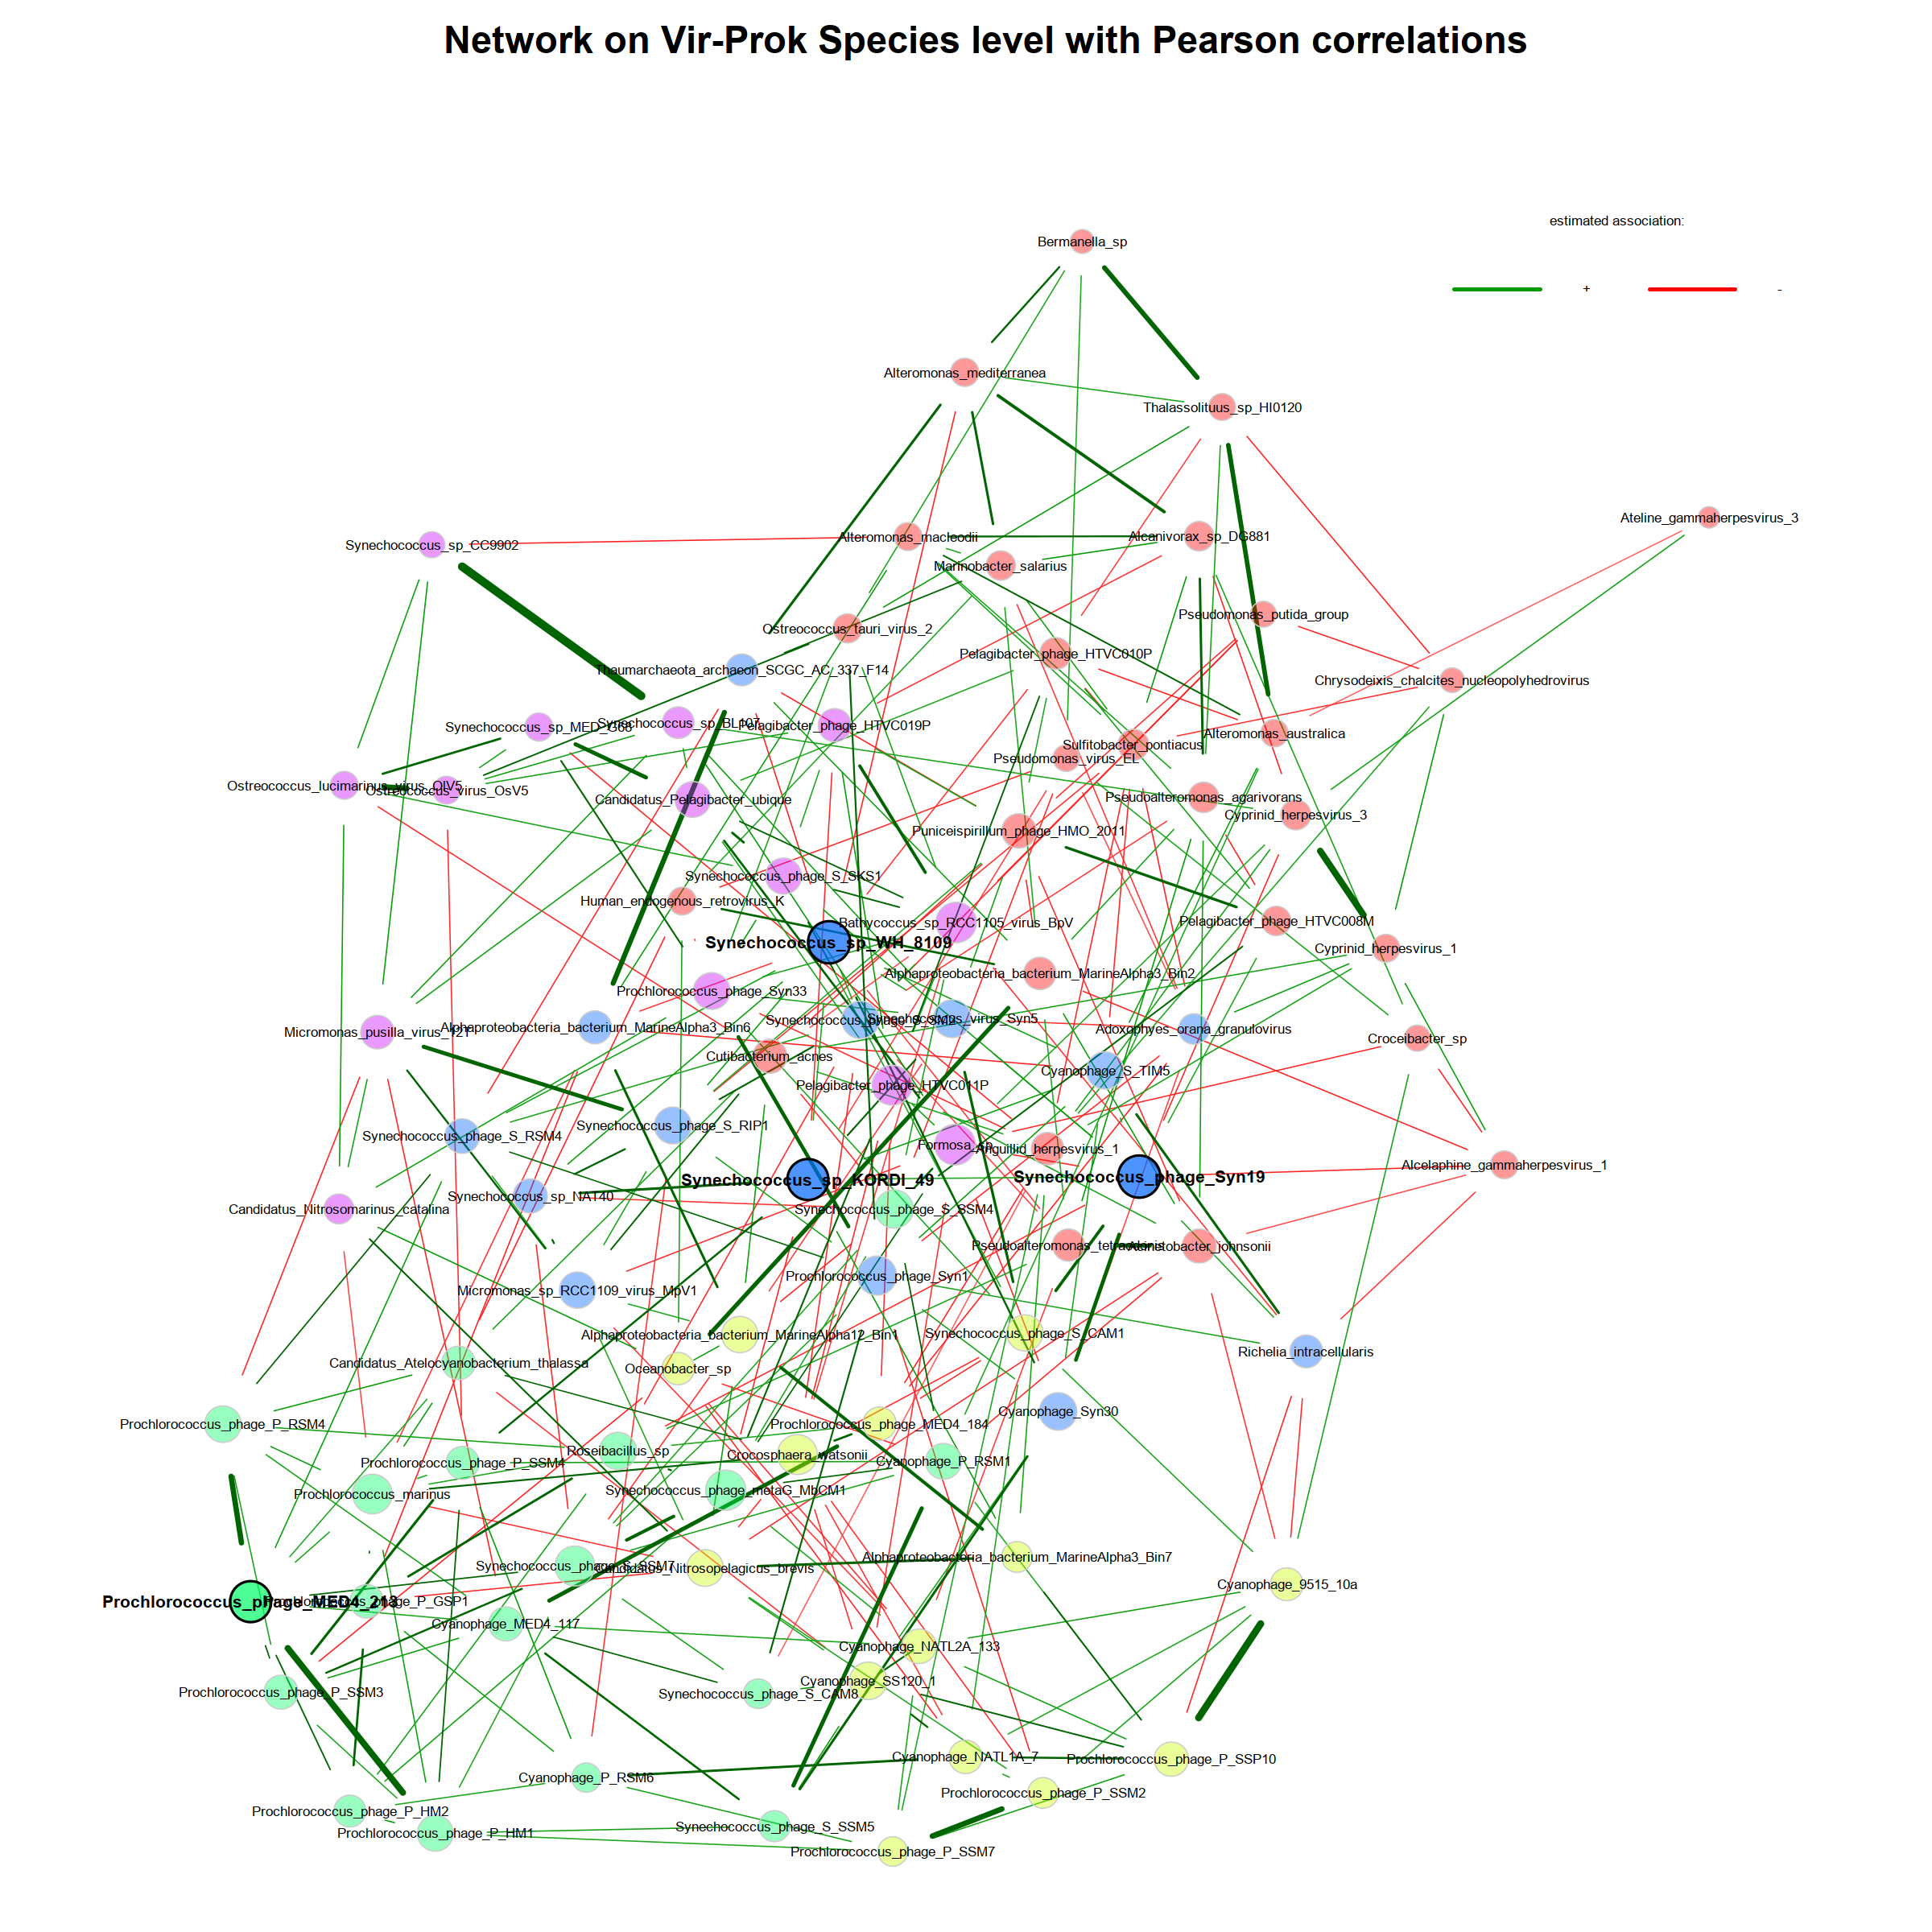

In [140]:
options(repr.plot.width=20, repr.plot.height=20)

p_VirProk <- plot(props_single_VirProk,
          layout = "layout_with_fr",
          labelScale = FALSE,
          rmSingles = FALSE,
          shortenLabels = "simple",
          labelLength = 50,
          charToRm = "s__",
          nodeColor = "cluster", 
          nodeSize = "eigenvector", # clr
          nodeSizeSpread = 3,
          hubBorderCol = "black",
          repulsion = 0.8,
          cexNodes = 3,
          cexLabels = 0.8,
          cexHubLabels = 1,
          title1 = "Network on Vir-Prok Species level with Pearson correlations", 
          showTitle = TRUE,
          cexTitle = 2.3, 

         )

legend(0.6, 1.1, cex = 0.8, title = "estimated association:",
       legend = c("+","-"), lty = 1, lwd = 3, col = c("#009900","red"), 
       bty = "n", horiz = TRUE)

## Select HOT Samples

###  - prepare HOT metadata

In [109]:
#unique(HOT_pct_meta_df.long$Year_Month)
Year_Month_Order <- c(
  '2003_1', '2003_2', '2003_3', '2003_4', '2003_5', '2003_6', '2003_7', '2003_8', '2003_10', '2003_11', '2003_12', 
  '2004_2', '2004_4', '2004_5', '2004_6', '2004_8', '2004_9', '2004_10', '2004_11', '2004_12', 
  '2009_8', '2009_11')
HOT_metadata_df.long <- metadata_df %>% 
  filter(Cruise_Series == "HOT") %>%
  mutate(MonthRange = case_when(Collection_Month>=1 & Collection_Month<=6 ~ "1-6",
                                Collection_Month>=7 & Collection_Month<=12 ~ "7-12")) %>% 
  mutate(MonthRange = factor(MonthRange, levels=c("1-6", "7-12"))) %>% 
  mutate(Month_Name = month.name[Collection_Month]) %>%
  mutate(Month_Name = factor(Month_Name, levels=month.name)) %>%
  mutate(Year_Month=paste(Collection_Year, Collection_Month, sep = "_")) %>% 
  mutate(Year_Month=factor(Year_Month, levels=Year_Month_Order)) %>% 
  select(NCBI_SRA_Acc, Collection_Year, MonthRange, Month_Name, Depth, Year_Month) %>% 
  mutate(DepthRange = case_when(Depth>=1 & Depth<=60 ~ "0-60",
                                Depth>=61 & Depth<=125 ~ "61-125",
                                Depth>=126 & Depth<=180 ~ "126-180")) %>% 
  mutate(DepthRange = factor(DepthRange, levels=c("0-60", "61-125", "126-180"))) %>% 
  select(NCBI_SRA_Acc, MonthRange, Year_Month, DepthRange)
head(HOT_metadata_df.long, 2)

NCBI_SRA_Acc MonthRange Year_Month DepthRange
1 SRR5720299   1-6        2004_2     0-60      
2 SRR5720300   1-6        2004_2     61-125

In [110]:
# order rows first by month range, then by depth range
rownames(HOT_metadata_df.long) <- HOT_metadata_df.long$NCBI_SRA_Acc
HOT_metadata_df.long <- HOT_metadata_df.long[order(HOT_metadata_df.long$MonthRange, HOT_metadata_df.long$DepthRange), ]
head(HOT_metadata_df.long, 2)

NCBI_SRA_Acc MonthRange Year_Month DepthRange
SRR5720299 SRR5720299   1-6        2004_2     0-60      
SRR5720302 SRR5720302   1-6        2004_4     0-60

### - slice HOT phyloseq object

In [111]:
ps.hot <- subset_samples(ps, Cruise_Series == "HOT")
ps.hot

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 479 taxa and 68 samples ]
sample_data() Sample Data:       [ 68 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 479 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 283 taxa and 68 samples ]
sample_data() Sample Data:       [ 68 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 283 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 111 taxa and 68 samples ]
sample_data() Sample Data:       [ 68 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 111 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


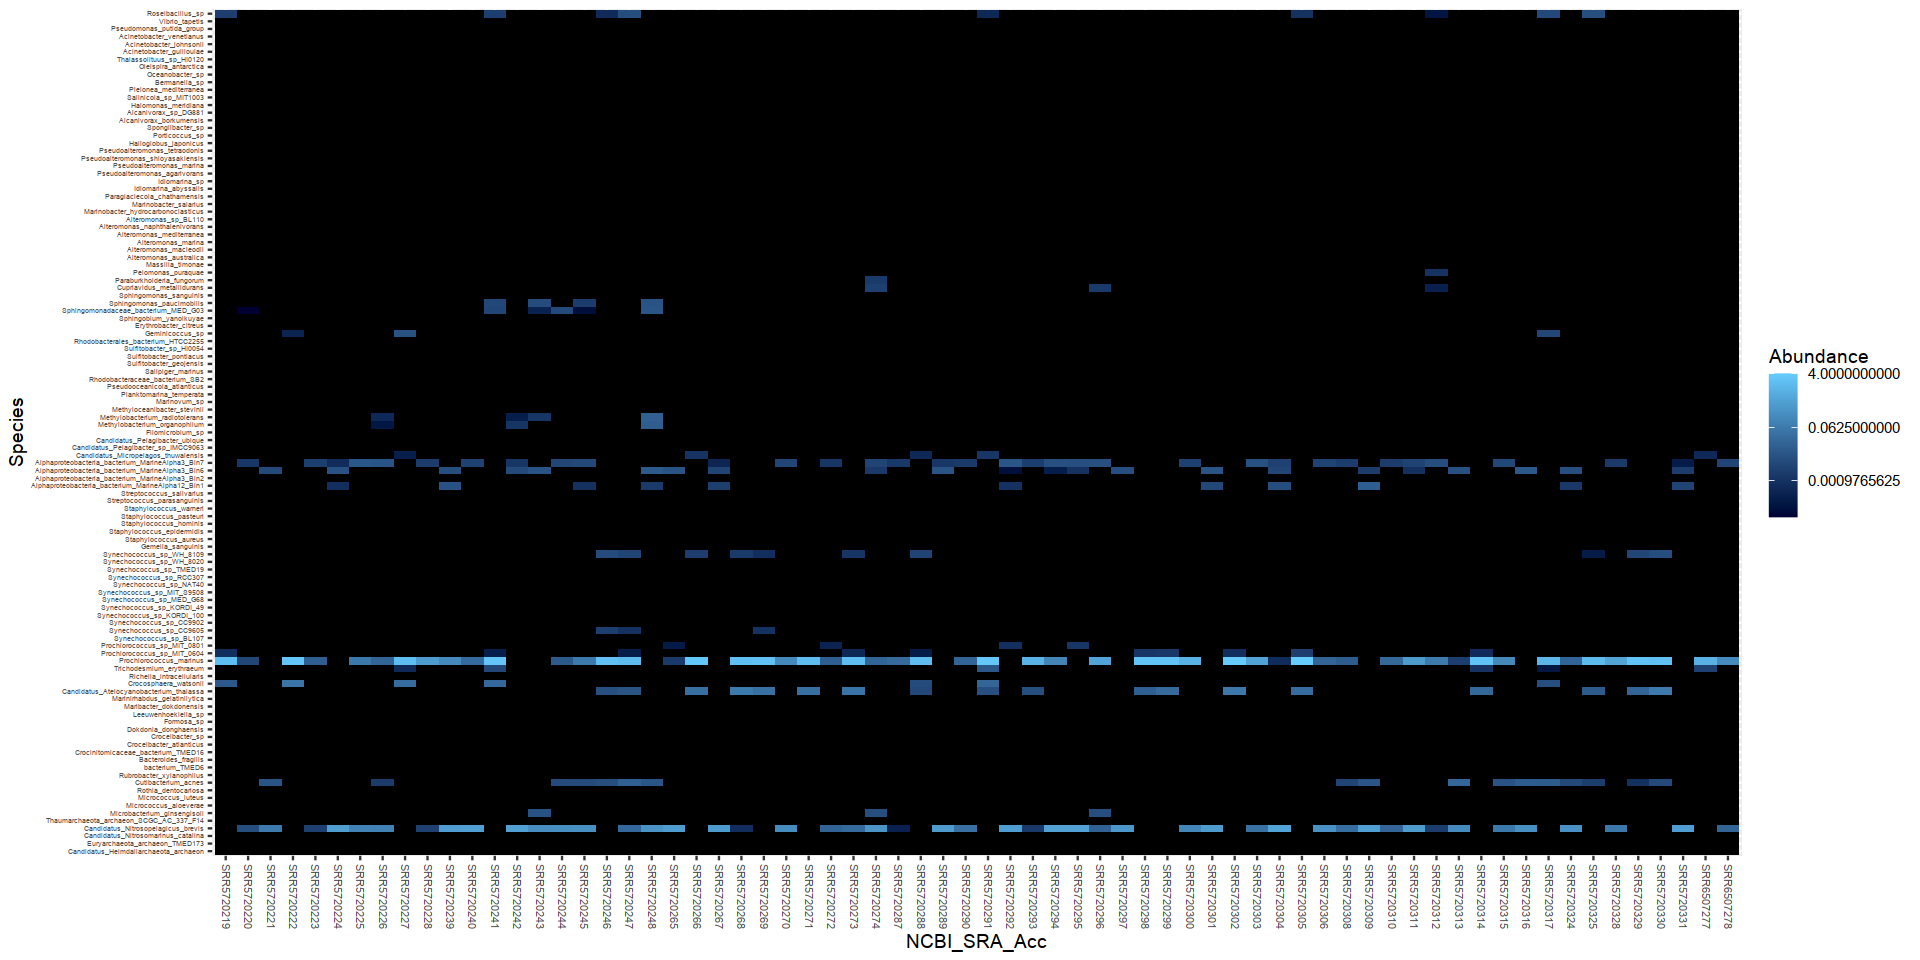

In [212]:
options(repr.plot.width=16, repr.plot.height=8)

# select all prokaryotes
ps.hot.pro <- subset_taxa(ps.hot, Kingdom %in% c("Bacteria", "Archaea"))
ps.hot.pro

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.hot.pro.species <- subset_taxa(ps.hot.pro, !is.na(Species))
ps.hot.pro.species

plot_heatmap(ps.hot.pro.species,
             taxa.label="Species", 
             taxa.order="Species",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))

ggsave(filename="BioGEOTRACES_HOT_MetaPhlAn3_Prokaryotes_by_Species.pdf", 
       plot = last_plot(), path="./", 
       scale = 1, width = 400, height = 200, units = "mm",
       dpi = 300, limitsize = FALSE)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 188 taxa and 68 samples ]
sample_data() Sample Data:       [ 68 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 188 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 120 taxa and 68 samples ]
sample_data() Sample Data:       [ 68 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 120 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


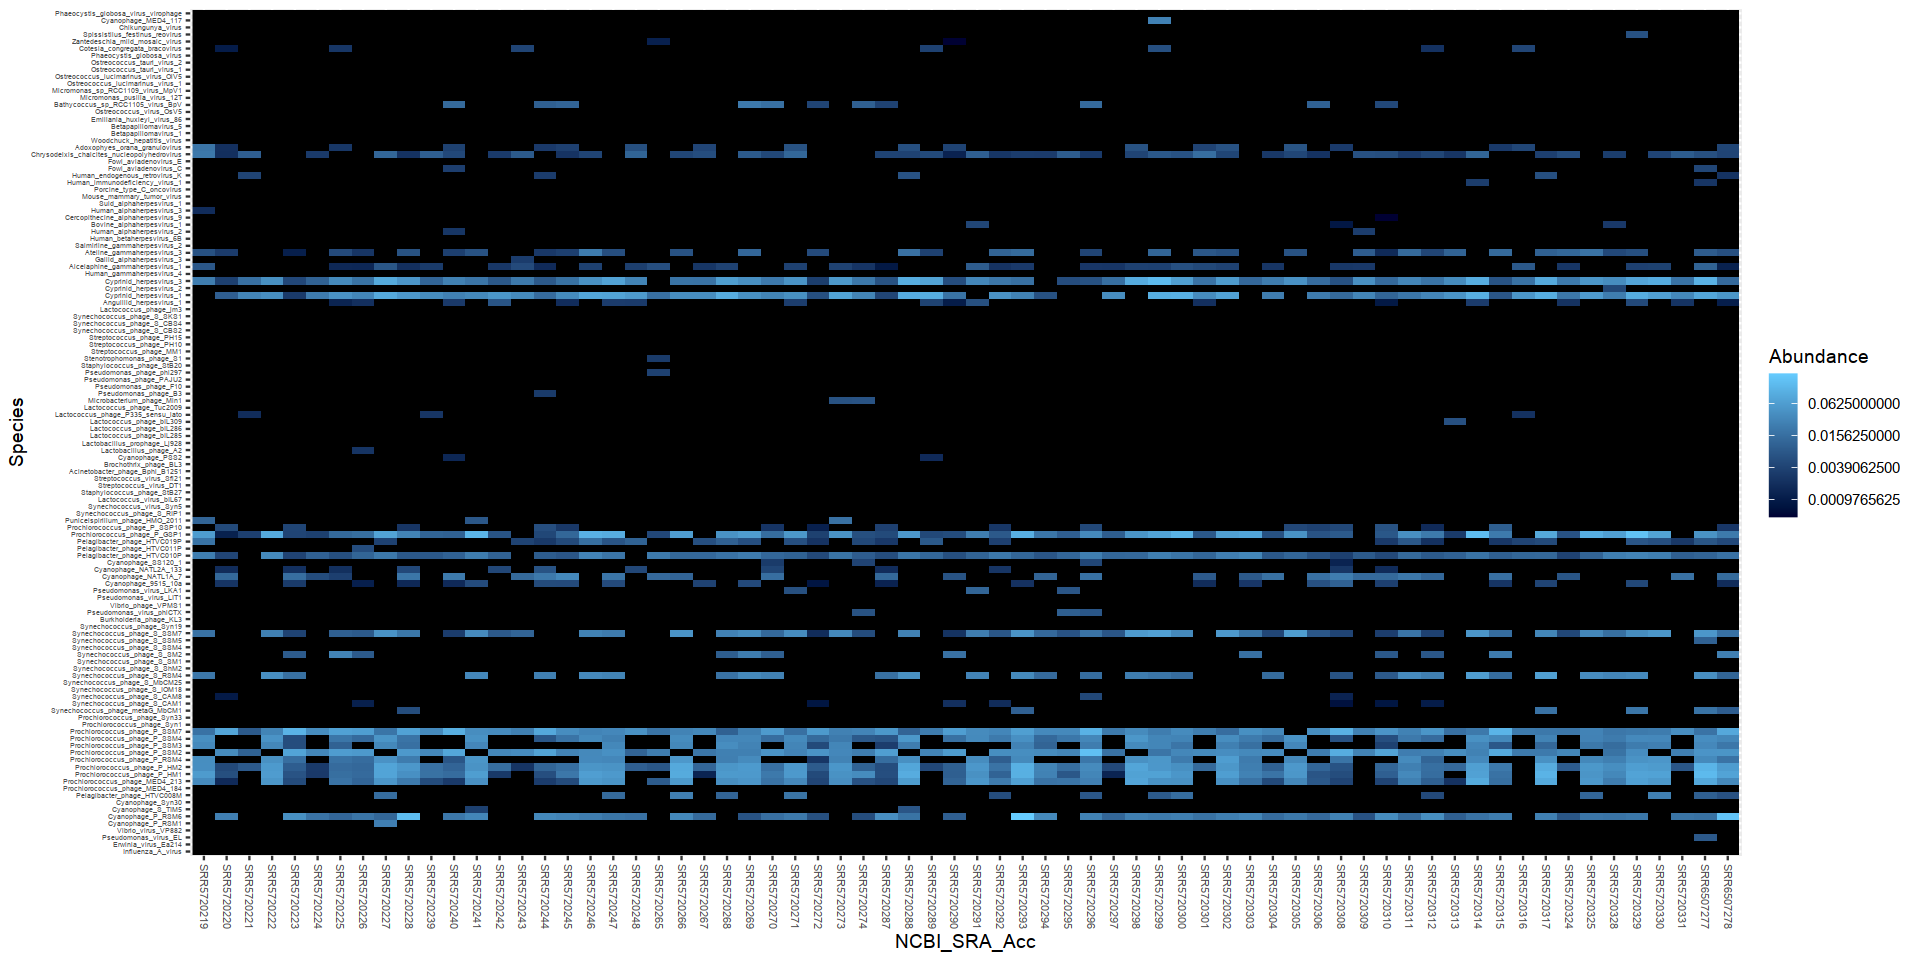

In [112]:
options(repr.plot.width=16, repr.plot.height=8)

# select all viruses
ps.hot.vir <- subset_taxa(ps.hot, Kingdom == "Viruses")
ps.hot.vir

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.hot.vir.species <- subset_taxa(ps.hot.vir, !is.na(Species))
ps.hot.vir.species

plot_heatmap(ps.hot.vir.species,
             taxa.label="Species", 
             taxa.order="Species",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))

ggsave(filename="BioGEOTRACES_HOT_MetaPhlAn3_Viruses_by_Species.pdf", 
       plot = last_plot(), path="./", 
       scale = 1, width = 400, height = 200, units = "mm",
       dpi = 300, limitsize = FALSE)

### - get HOT prokaryotes abundance table

In [113]:
# get HOT Prokaryotes abundance table
HOT_pro_species_abund <- t(otu_table(ps.hot.pro.species))
ncol(HOT_pro_species_abund)
# colnames(HOT_pro_species_abund)

# select columns with colum sum >= 1e-6
keep_cols <- colSums(HOT_pro_species_abund) >= 1e-6
HOT_pro_species_abund <- HOT_pro_species_abund[, keep_cols]
ncol(HOT_pro_species_abund)
head(HOT_pro_species_abund, 2)

ERROR: Error in otu_table(ps.hot.pro.species): object 'ps.hot.pro.species' not found


In [ ]:
# order rows according to metadata based on MonthRange and DepthRange
row_order <- rownames(HOT_metadata_df.long)
HOT_pro_species_abund <- HOT_pro_species_abund[row_order, ]

In [ ]:
options(repr.plot.width=16, repr.plot.height=8)

library(pheatmap)
library("RColorBrewer")

hot_sample_meta <- HOT_metadata_df.long[, c("DepthRange", "MonthRange")]

pheat.hot.pro <- pheatmap(t(HOT_pro_species_abund), 
         #legend_breaks = -4:4, legend_labels = paste('1e', -4:4, sep=''), 
         cluster_cols = F, 
         cluster_rows = T, 
         annotation_col = hot_sample_meta,     
         annotation_colors = list(
             DepthRange = c(`0-60` = "lightblue", `61-125` = "blue", `126-180` = "darkblue"),
             MonthRange = setNames(brewer.pal(9, "Paired")[c(3, 4)],
                             c("1-6", "7-12"))),
         fontsize_col = 6, 
         fontsize_row = 10, 
         angle_col = 45,
         cutree_rows = 1,
         show_rownames = T)

pdf("BioGEOTRACES_HOT_MetaPhlAn3_Prokaryotes_by_Species_pheatmap.pdf", width=16, height=8)
print(pheat.hot.pro)
dev.off()

print(pheat.hot.pro)

### - get HOT viruses abundance table

In [239]:
HOT_vir_species_abund <- t(otu_table(ps.hot.vir.species))
ncol(HOT_vir_species_abund)
# colnames(HOT_vir_species_abund)

# select columns with colum sum >= 1e-6
keep_cols <- colSums(HOT_vir_species_abund) >= 1e-6
HOT_vir_species_abund <- HOT_vir_species_abund[, keep_cols]

# remove columns of eukaryotic viruses
remove_cols <- c('s__Anguillid_herpesvirus_1', 
                 's__Cyprinid_herpesvirus_1', 
                 's__Cyprinid_herpesvirus_2', 
                 's__Cyprinid_herpesvirus_3',
                 's__Alcelaphine_gammaherpesvirus_1', 
                 's__Gallid_alphaherpesvirus_3',
                 's__Ateline_gammaherpesvirus_3',
                 's__Human_alphaherpesvirus_2',
                 's__Bovine_alphaherpesvirus_1',
                 's__Cercopithecine_alphaherpesvirus_9',
                 's__Human_alphaherpesvirus_3',
                 's__Human_immunodeficiency_virus_1',
                 's__Human_endogenous_retrovirus_K',
                 's__Fowl_aviadenovirus_C',
                 's__Chrysodeixis_chalcites_nucleopolyhedrovirus',
                 's__Adoxophyes_orana_granulovirus',
                 's__Cotesia_congregata_bracovirus',
                 's__Zantedeschia_mild_mosaic_virus',
                 's__Spissistilus_festinus_reovirus')
HOT_vir_species_abund <- HOT_vir_species_abund[, -which(colnames(HOT_vir_species_abund) %in% remove_cols)]
ncol(HOT_vir_species_abund)
head(HOT_vir_species_abund, 2)

[1] 120

[1] 42

s__Pseudomonas_virus_EL s__Cyanophage_P_RSM1 s__Cyanophage_P_RSM6
SRR6507278 0.000000000             0                    0.18186516          
SRR6507277 0.008024108             0                    0.01664047          
           s__Cyanophage_S_TIM5 s__Pelagibacter_phage_HTVC008M
SRR6507278 0                    0.006249363                   
SRR6507277 0                    0.009556543                   
           s__Prochlorococcus_phage_MED4_213 s__Prochlorococcus_phage_P_HM1
SRR6507278 0.03448036                        0.07434829                    
SRR6507277 0.08511603                        0.14304917                    
           s__Prochlorococcus_phage_P_HM2 s__Prochlorococcus_phage_P_RSM4
SRR6507278 0.06035959                     0.01791353                     
SRR6507277 0.11991804                     0.03529779                     
           s__Prochlorococcus_phage_P_SSM2 ⋯ s__Cyanophage_PSS2
SRR6507278 0.04892582                      ⋯ 0                 
SRR6507277 0.04832480                      ⋯ 0                 
           s__Lactobacillus_phage_A2 s__Lactococcus_phage_P335_sensu_lato
SRR6507278 0                         0                                   
SRR6507277 0                         0                                   
           s__Lactococcus_phage_bIL309 s__Microbacterium_phage_Min1
SRR6507278 0                           0                           
SRR6507277 0                           0                           
           s__Pseudomonas_phage_B3 s__Pseudomonas_phage_phi297
SRR6507278 0                       0                          
SRR6507277 0                       0                          
           s__Stenotrophomonas_phage_S1 s__Bathycoccus_sp_RCC1105_virus_BpV
SRR6507278 0                            0                                  
SRR6507277 0                            0                                  
           s__Cyanophage_MED4_117
SRR6507278 0                     
SRR6507277 0

In [240]:
# order rows according to metadata based on MonthRange and DepthRange
row_order <- rownames(HOT_metadata_df.long)
HOT_vir_species_abund <- HOT_vir_species_abund[row_order, ]

In [224]:
#HOT_vir_species_abund_meta <- merge(HOT_metadata_df.long, HOT_vir_species_abund, by="row.names")
#rownames(HOT_vir_species_abund_meta) <- HOT_vir_species_abund_meta$Row.names
#HOT_vir_species_abund_meta <- HOT_vir_species_abund_meta[, -1]
#head(HOT_vir_species_abund_meta, 2)

png 
  2

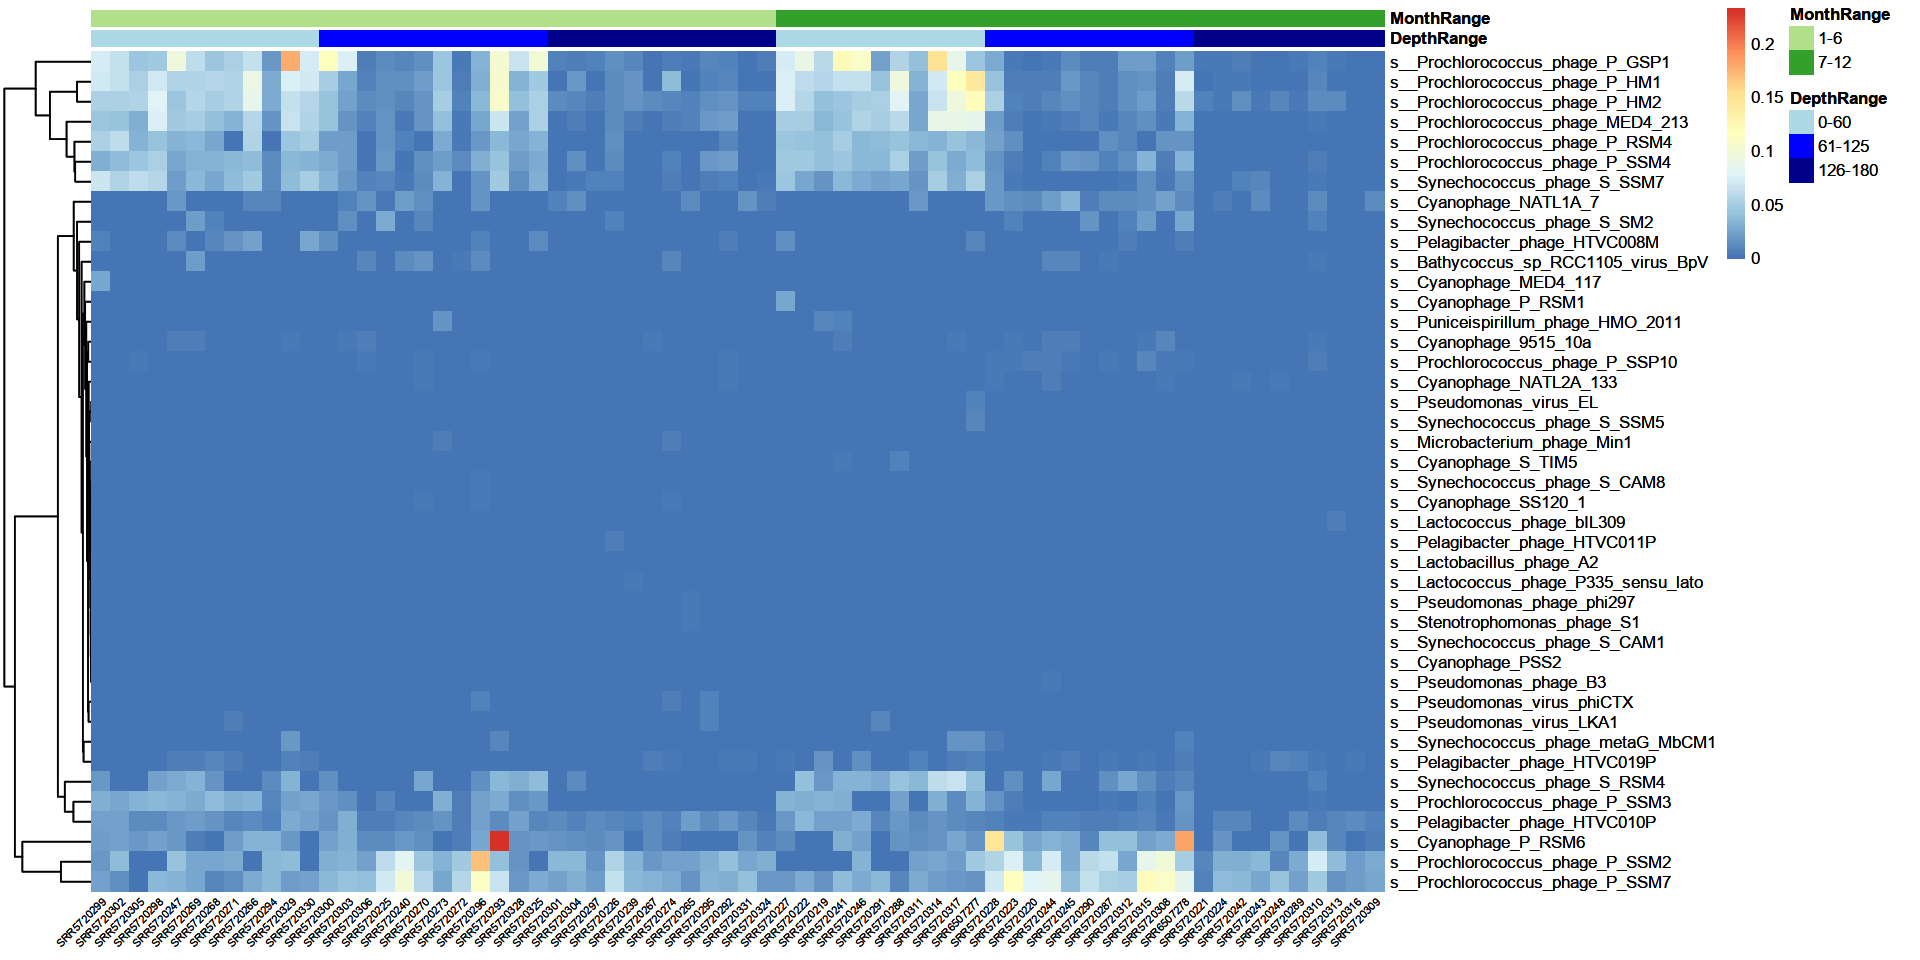

In [241]:
options(repr.plot.width=16, repr.plot.height=8)

library(pheatmap)
library("RColorBrewer")

hot_sample_meta <- HOT_metadata_df.long[, c("DepthRange", "MonthRange")]

pheat.hot.vir <- pheatmap(t(HOT_vir_species_abund), 
         #legend_breaks = -4:4, legend_labels = paste('1e', -4:4, sep=''), 
         cluster_cols = F, 
         cluster_rows = T, 
         annotation_col = hot_sample_meta,     
         annotation_colors = list(
             DepthRange = c(`0-60` = "lightblue", `61-125` = "blue", `126-180` = "darkblue"),
             MonthRange = setNames(brewer.pal(9, "Paired")[c(3, 4)],
                             c("1-6", "7-12"))),
         fontsize_col = 6, 
         fontsize_row = 10, 
         angle_col = 45,
         cutree_rows = 1,
         show_rownames = T)

pdf("BioGEOTRACES_HOT_MetaPhlAn3_Viruses_by_Species_pheatmap.pdf", width=16, height=8)
print(pheat.hot.vir)
dev.off()

print(pheat.hot.vir)

## Select BATS Samples

###  - prepare BATS metadata

In [195]:
#unique(BATS_pct_meta_df.long$Year_Month)
Year_Month_Order <- c(
  '2003_1', '2003_2', '2003_3', '2003_4', '2003_5', '2003_6', '2003_7', '2003_8', '2003_10', '2003_11', '2003_12', 
  '2004_2', '2004_4', '2004_5', '2004_6', '2004_8', '2004_9', '2004_10', '2004_11', '2004_12', 
  '2009_8', '2009_11')
BATS_metadata_df.long <- metadata_df %>% 
  filter(Cruise_Series == "BATS") %>%
  mutate(MonthRange = case_when(Collection_Month>=1 & Collection_Month<=6 ~ "1-6",
                                Collection_Month>=7 & Collection_Month<=12 ~ "7-12")) %>% 
  mutate(MonthRange = factor(MonthRange, levels=c("1-6", "7-12"))) %>% 
  mutate(Month_Name = month.name[Collection_Month]) %>%
  mutate(Month_Name = factor(Month_Name, levels=month.name)) %>%
  mutate(Year_Month=paste(Collection_Year, Collection_Month, sep = "_")) %>% 
  mutate(Year_Month=factor(Year_Month, levels=Year_Month_Order)) %>% 
  select(NCBI_SRA_Acc, Collection_Year, MonthRange, Month_Name, Depth, Year_Month) %>% 
  mutate(DepthRange = case_when(Depth>=1 & Depth<=60 ~ "0-60",
                                Depth>=61 & Depth<=125 ~ "61-125",
                                Depth>=126 & Depth<=180 ~ "126-180")) %>% 
  mutate(DepthRange = factor(DepthRange, levels=c("0-60", "61-125", "126-180"))) %>% 
  select(NCBI_SRA_Acc, MonthRange, Year_Month, DepthRange)
head(BATS_metadata_df.long, 2)

NCBI_SRA_Acc MonthRange Year_Month DepthRange
1 SRR5720327   1-6        2003_4     0-60      
2 SRR5720326   1-6        2003_4     61-125

In [196]:
# order rows first by month range, then by depth range
rownames(BATS_metadata_df.long) <- BATS_metadata_df.long$NCBI_SRA_Acc
BATS_metadata_df.long <- BATS_metadata_df.long[order(BATS_metadata_df.long$MonthRange, BATS_metadata_df.long$DepthRange), ]
head(BATS_metadata_df.long, 2)

NCBI_SRA_Acc MonthRange Year_Month DepthRange
SRR5720327 SRR5720327   1-6        2003_4     0-60      
SRR5720338 SRR5720338   1-6        NA         0-60

### - slice BATS phyloseq object

In [197]:
ps.bats <- subset_samples(ps, Cruise_Series == "BATS")
ps.bats

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 479 taxa and 62 samples ]
sample_data() Sample Data:       [ 62 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 479 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 283 taxa and 62 samples ]
sample_data() Sample Data:       [ 62 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 283 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 111 taxa and 62 samples ]
sample_data() Sample Data:       [ 62 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 111 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


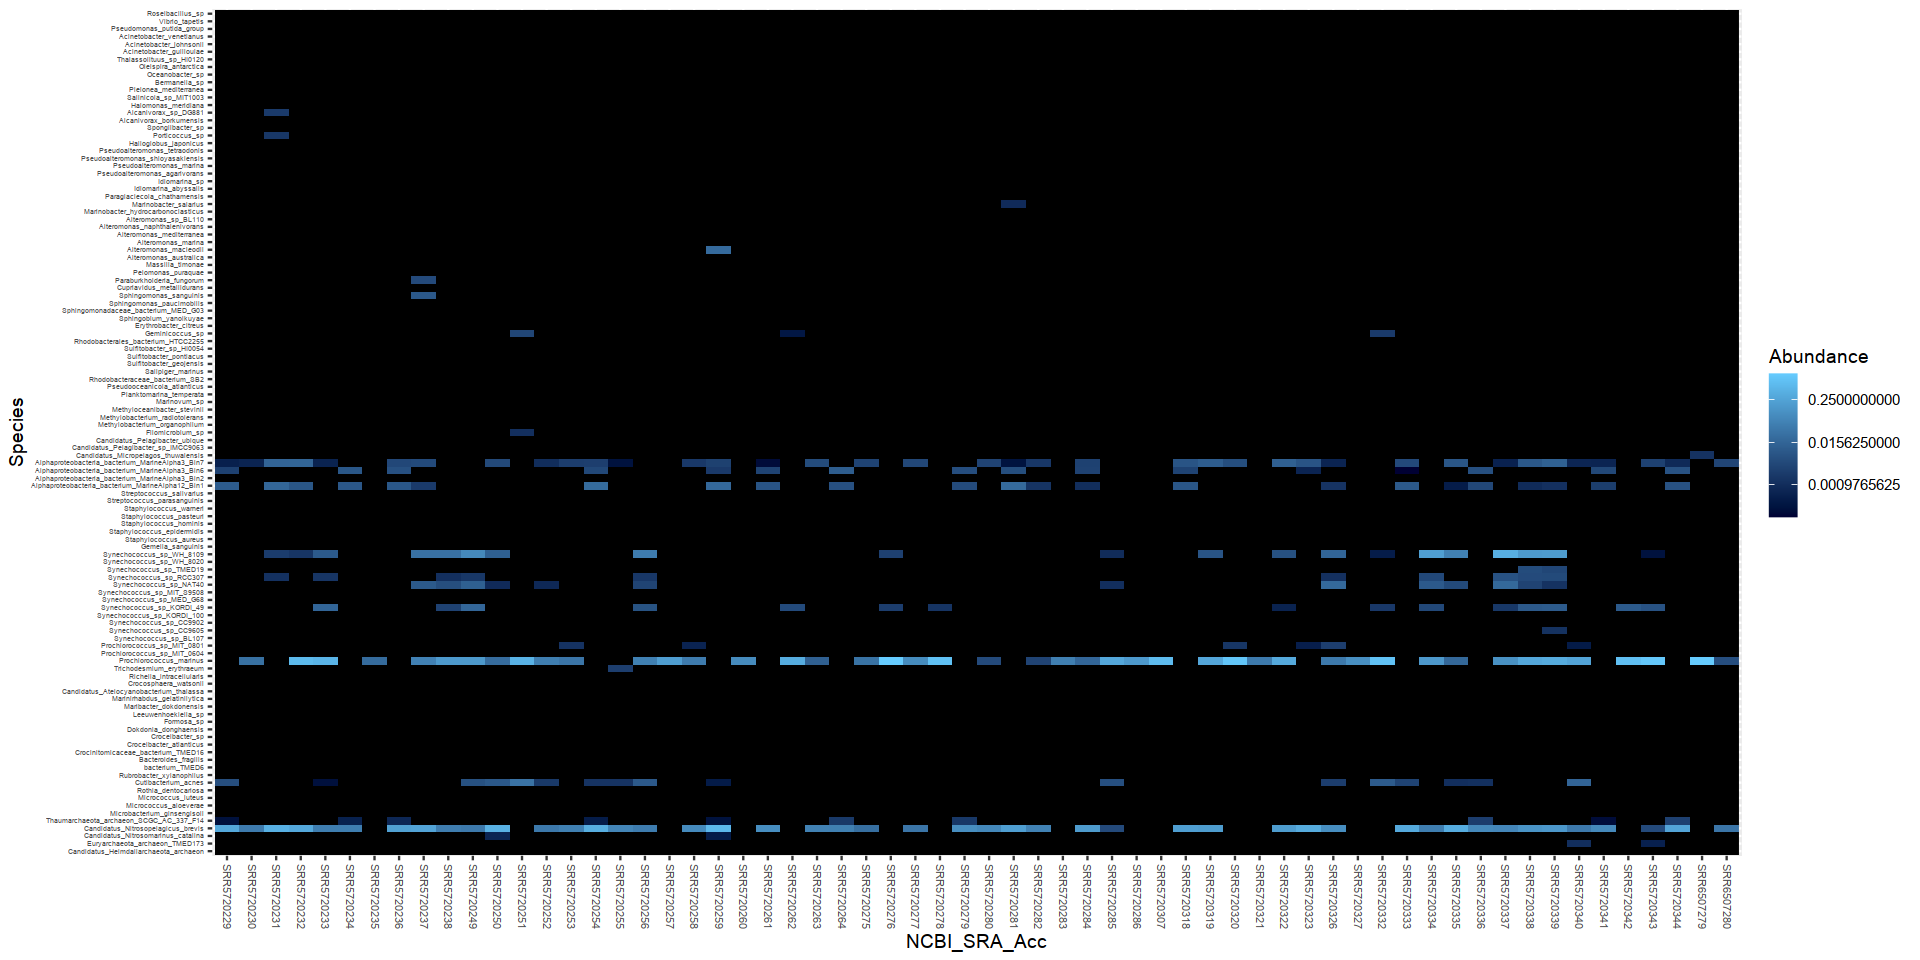

In [198]:
options(repr.plot.width=16, repr.plot.height=8)

# select all prokaryotes
ps.bats.pro <- subset_taxa(ps.bats, Kingdom %in% c("Bacteria", "Archaea"))
ps.bats.pro

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.bats.pro.species <- subset_taxa(ps.bats.pro, !is.na(Species))
ps.bats.pro.species

plot_heatmap(ps.bats.pro.species,
             taxa.label="Species", 
             taxa.order="Species",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))

ggsave(filename="BioGEOTRACES_BATS_MetaPhlAn3_Prokaryotes_by_Species.pdf", 
       plot = last_plot(), path="./", 
       scale = 1, width = 400, height = 200, units = "mm",
       dpi = 300, limitsize = FALSE)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 188 taxa and 62 samples ]
sample_data() Sample Data:       [ 62 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 188 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 120 taxa and 62 samples ]
sample_data() Sample Data:       [ 62 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 120 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


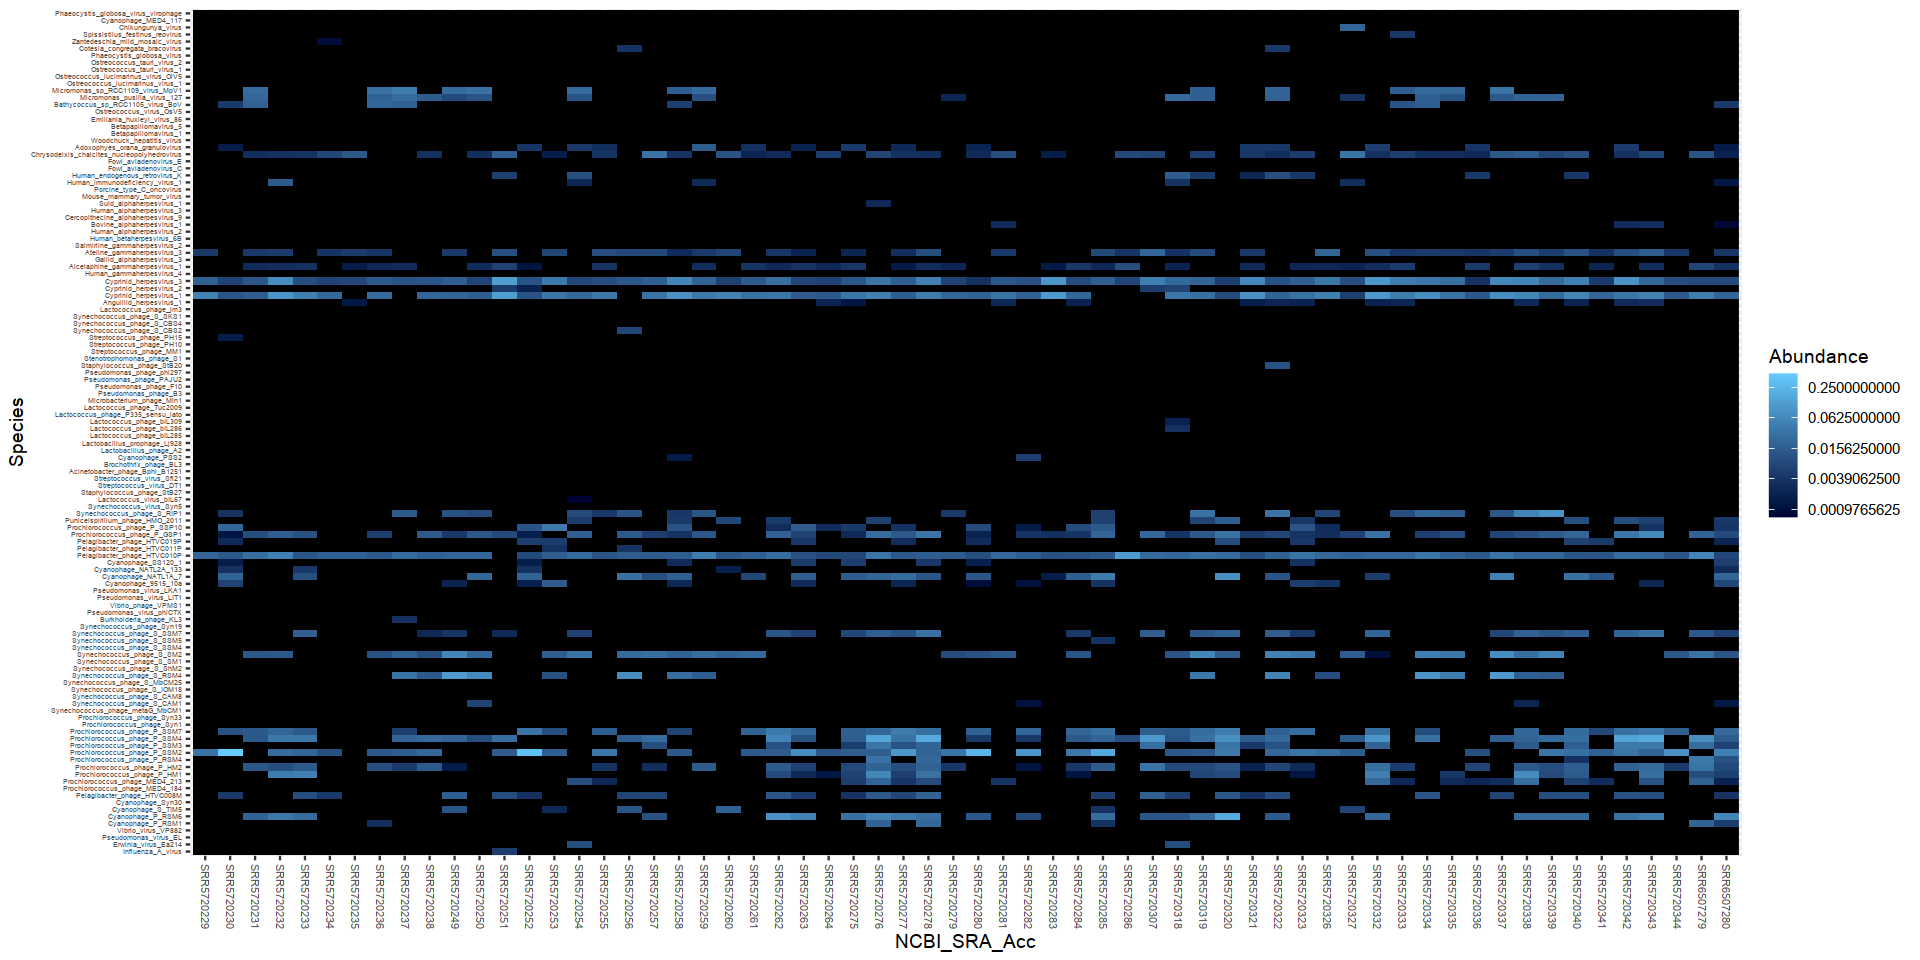

In [199]:
options(repr.plot.width=16, repr.plot.height=8)

# select all viruses
ps.bats.vir <- subset_taxa(ps.bats, Kingdom == "Viruses")
ps.bats.vir

# select taxa at Genus level, those Genus shouldn't been NA, but Species should be NA to exclude decendent taxa 
ps.bats.vir.species <- subset_taxa(ps.bats.vir, !is.na(Species))
ps.bats.vir.species

plot_heatmap(ps.bats.vir.species,
             taxa.label="Species", 
             taxa.order="Species",
             sample.label = "NCBI_SRA_Acc", 
             sample.order = sort(colnames(merged_metaphlan_df)))

ggsave(filename="BioGEOTRACES_BATS_MetaPhlAn3_Viruses_by_Species.pdf", 
       plot = last_plot(), path="./", 
       scale = 1, width = 400, height = 200, units = "mm",
       dpi = 300, limitsize = FALSE)

### - get BATS prokaryotes abundance table

In [200]:
# get BATS Prokaryotes abundance table
BATS_pro_species_abund <- t(otu_table(ps.bats.pro.species))
ncol(BATS_pro_species_abund)
# colnames(BATS_pro_species_abund)

# select columns with colum sum >= 1e-6
keep_cols <- colSums(BATS_pro_species_abund) >= 1e-6
BATS_pro_species_abund <- BATS_pro_species_abund[, keep_cols]
ncol(BATS_pro_species_abund)
head(BATS_pro_species_abund, 2)

[1] 111

[1] 26

s__Euryarchaeota_archaeon_TMED173
SRR6507280 0                                
SRR6507279 0                                
           s__Candidatus_Nitrosomarinus_catalina
SRR6507280 0                                    
SRR6507279 0                                    
           s__Candidatus_Nitrosopelagicus_brevis
SRR6507280 0.03269634                           
SRR6507279 0.00000000                           
           s__Thaumarchaeota_archaeon_SCGC_AC_337_F14 s__Cutibacterium_acnes
SRR6507280 0                                          0                     
SRR6507279 0                                          0                     
           s__Trichodesmium_erythraeum s__Prochlorococcus_marinus
SRR6507280 0                           0.005118657               
SRR6507279 0                           1.342974840               
           s__Prochlorococcus_sp_MIT_0801 s__Synechococcus_sp_CC9605
SRR6507280 0                              0                         
SRR6507279 0                              0                         
           s__Synechococcus_sp_KORDI_49 ⋯
SRR6507280 0                            ⋯
SRR6507279 0                            ⋯
           s__Alphaproteobacteria_bacterium_MarineAlpha3_Bin7
SRR6507280 0.003304635                                       
SRR6507279 0.000000000                                       
           s__Candidatus_Micropelagos_thuwalensis s__Filomicrobium_sp
SRR6507280 0.000000000                            0                  
SRR6507279 0.001243065                            0                  
           s__Geminicoccus_sp s__Sphingomonas_sanguinis
SRR6507280 0                  0                        
SRR6507279 0                  0                        
           s__Paraburkholderia_fungorum s__Alteromonas_macleodii
SRR6507280 0                            0                       
SRR6507279 0                            0                       
           s__Marinobacter_salarius s__Porticoccus_sp s__Alcanivorax_sp_DG881
SRR6507280 0                        0                 0                      
SRR6507279 0                        0                 0

In [201]:
# order rows according to metadata based on MonthRange and DepthRange
row_order <- rownames(BATS_metadata_df.long)
BATS_pro_species_abund <- BATS_pro_species_abund[row_order, ]

png 
  2

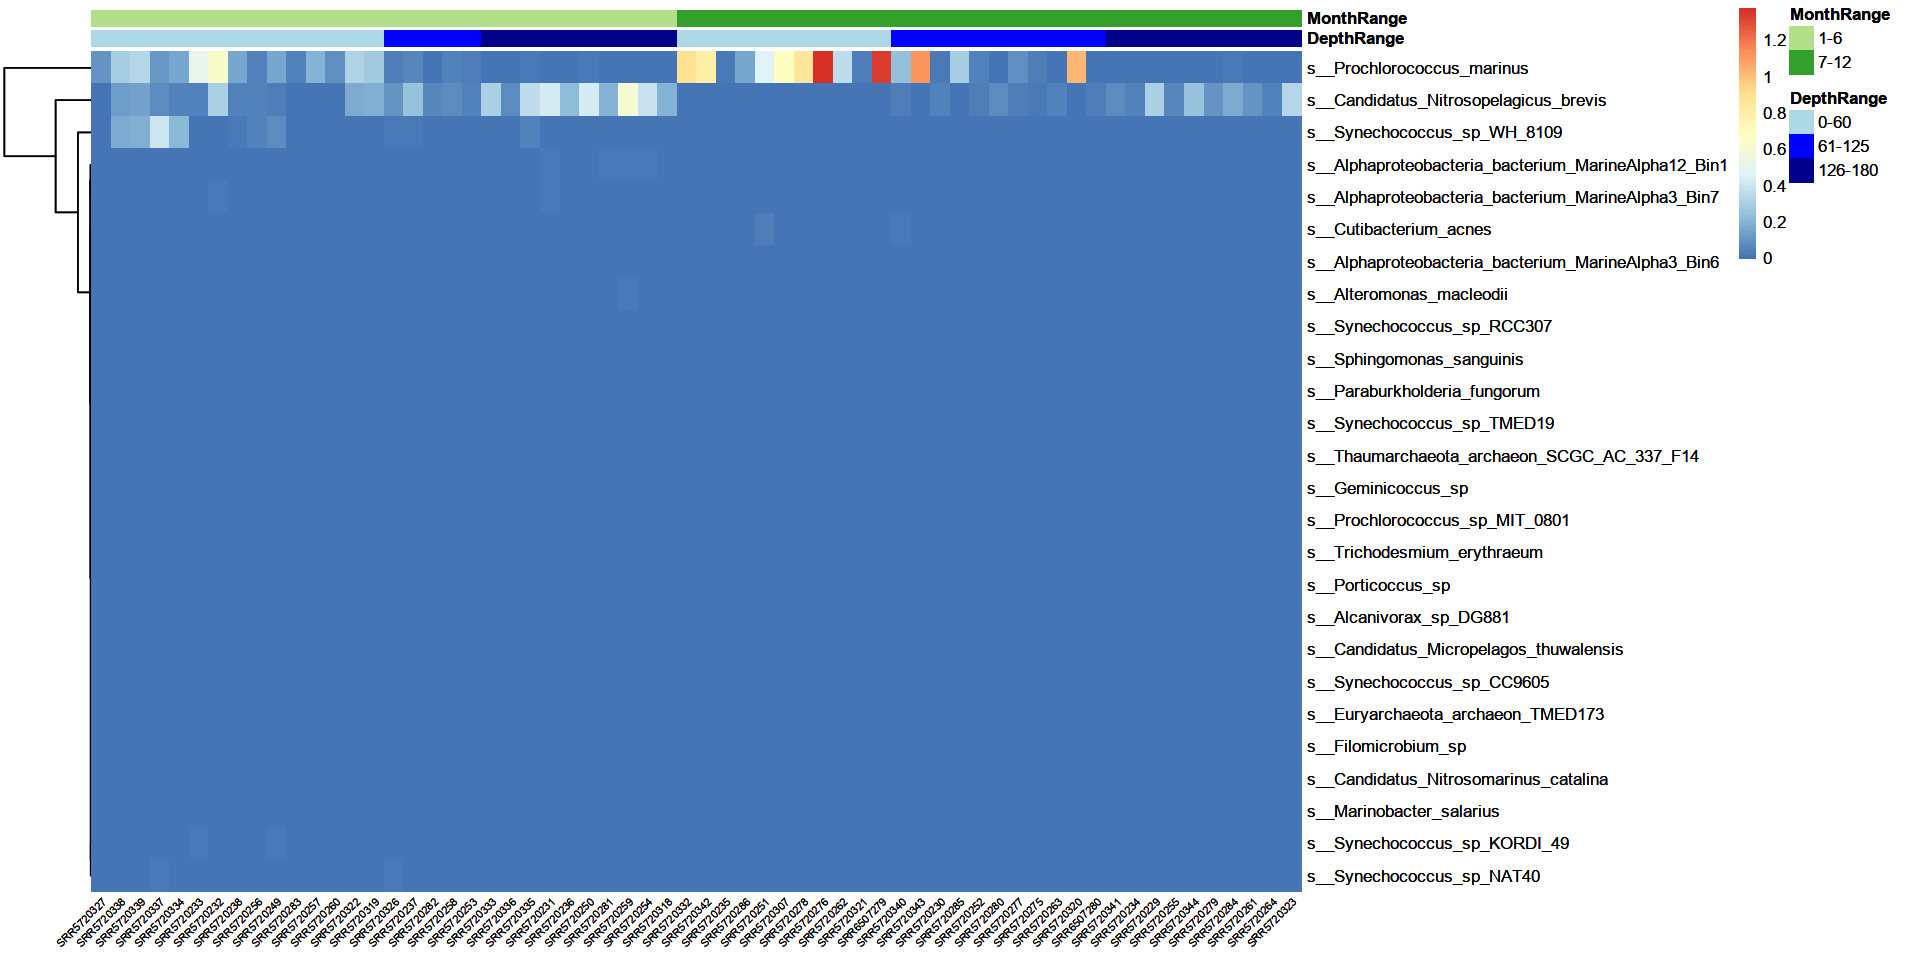

In [204]:
options(repr.plot.width=16, repr.plot.height=8)

library(pheatmap)
library("RColorBrewer")

bats_sample_meta <- BATS_metadata_df.long[, c("DepthRange", "MonthRange")]

pheat.bats.pro <- pheatmap(t(BATS_pro_species_abund), 
         #legend_breaks = -4:4, legend_labels = paste('1e', -4:4, sep=''), 
         cluster_cols = F, 
         cluster_rows = T, 
         annotation_col = bats_sample_meta,     
         annotation_colors = list(
             DepthRange = c(`0-60` = "lightblue", `61-125` = "blue", `126-180` = "darkblue"),
             MonthRange = setNames(brewer.pal(9, "Paired")[c(3, 4)],
                             c("1-6", "7-12"))),
         fontsize_col = 6, 
         fontsize_row = 10, 
         angle_col = 45,
         cutree_rows = 1,
         show_rownames = T)

pdf("BioGEOTRACES_BATS_MetaPhlAn3_Prokaryotes_by_Species_pheatmap.pdf", width=16, height=8)
print(pheat.bats.pro)
dev.off()

print(pheat.bats.pro)

### - get BATS viruses abundance table

In [205]:
BATS_vir_species_abund <- t(otu_table(ps.bats.vir.species))
ncol(BATS_vir_species_abund)
# colnames(BATS_vir_species_abund)

# select columns with colum sum >= 1e-6
keep_cols <- colSums(BATS_vir_species_abund) >= 1e-6
BATS_vir_species_abund <- BATS_vir_species_abund[, keep_cols]

# remove columns of eukaryotic viruses
remove_cols <- c('s__Influenza_A_virus',
                 's__Suid_alphaherpesvirus_1',
                 's__Chikungunya_virus',
                 's__Anguillid_herpesvirus_1', 
                 's__Cyprinid_herpesvirus_1', 
                 's__Cyprinid_herpesvirus_2', 
                 's__Cyprinid_herpesvirus_3',
                 's__Alcelaphine_gammaherpesvirus_1', 
                 's__Gallid_alphaherpesvirus_3',
                 's__Ateline_gammaherpesvirus_3',
                 's__Human_alphaherpesvirus_2',
                 's__Bovine_alphaherpesvirus_1',
                 's__Cercopithecine_alphaherpesvirus_9',
                 's__Human_alphaherpesvirus_3',
                 's__Human_immunodeficiency_virus_1',
                 's__Human_endogenous_retrovirus_K',
                 's__Fowl_aviadenovirus_C',
                 's__Chrysodeixis_chalcites_nucleopolyhedrovirus',
                 's__Adoxophyes_orana_granulovirus',
                 's__Cotesia_congregata_bracovirus',
                 's__Zantedeschia_mild_mosaic_virus',
                 's__Spissistilus_festinus_reovirus')
BATS_vir_species_abund <- BATS_vir_species_abund[, -which(colnames(BATS_vir_species_abund) %in% remove_cols)]
ncol(BATS_vir_species_abund)
head(BATS_vir_species_abund, 2)

[1] 120

[1] 40

s__Erwinia_virus_Ea214 s__Cyanophage_P_RSM1 s__Cyanophage_P_RSM6
SRR6507280 0                      0.005081844          0.05778194          
SRR6507279 0                      0.018783255          0.00000000          
           s__Cyanophage_S_TIM5 s__Pelagibacter_phage_HTVC008M
SRR6507280 0                    0.00372178                    
SRR6507279 0                    0.00000000                    
           s__Prochlorococcus_phage_MED4_213 s__Prochlorococcus_phage_P_HM1
SRR6507280 0.001920383                       0.005908225                   
SRR6507279 0.017673626                       0.008942267                   
           s__Prochlorococcus_phage_P_HM2 s__Prochlorococcus_phage_P_RSM4
SRR6507280 0.00806158                     0.01070145                     
SRR6507279 0.03256924                     0.03720538                     
           s__Prochlorococcus_phage_P_SSM2 ⋯ s__Lactococcus_virus_bIL67
SRR6507280 0.04800873                      ⋯ 0                         
SRR6507279 0.00000000                      ⋯ 0                         
           s__Cyanophage_PSS2 s__Lactococcus_phage_bIL286
SRR6507280 0                  0                          
SRR6507279 0                  0                          
           s__Lactococcus_phage_bIL309 s__Staphylococcus_phage_StB20
SRR6507280 0                           0                            
SRR6507279 0                           0                            
           s__Streptococcus_phage_PH15 s__Synechococcus_phage_S_CBS2
SRR6507280 0                           0                            
SRR6507279 0                           0                            
           s__Bathycoccus_sp_RCC1105_virus_BpV s__Micromonas_pusilla_virus_12T
SRR6507280 0.004839863                         0                              
SRR6507279 0.000000000                         0                              
           s__Micromonas_sp_RCC1109_virus_MpV1
SRR6507280 0                                  
SRR6507279 0

In [206]:
# order rows according to metadata based on MonthRange and DepthRange
BATS_vir_species_abund <- BATS_vir_species_abund[rownames(BATS_metadata_df.long), ]

png 
  2

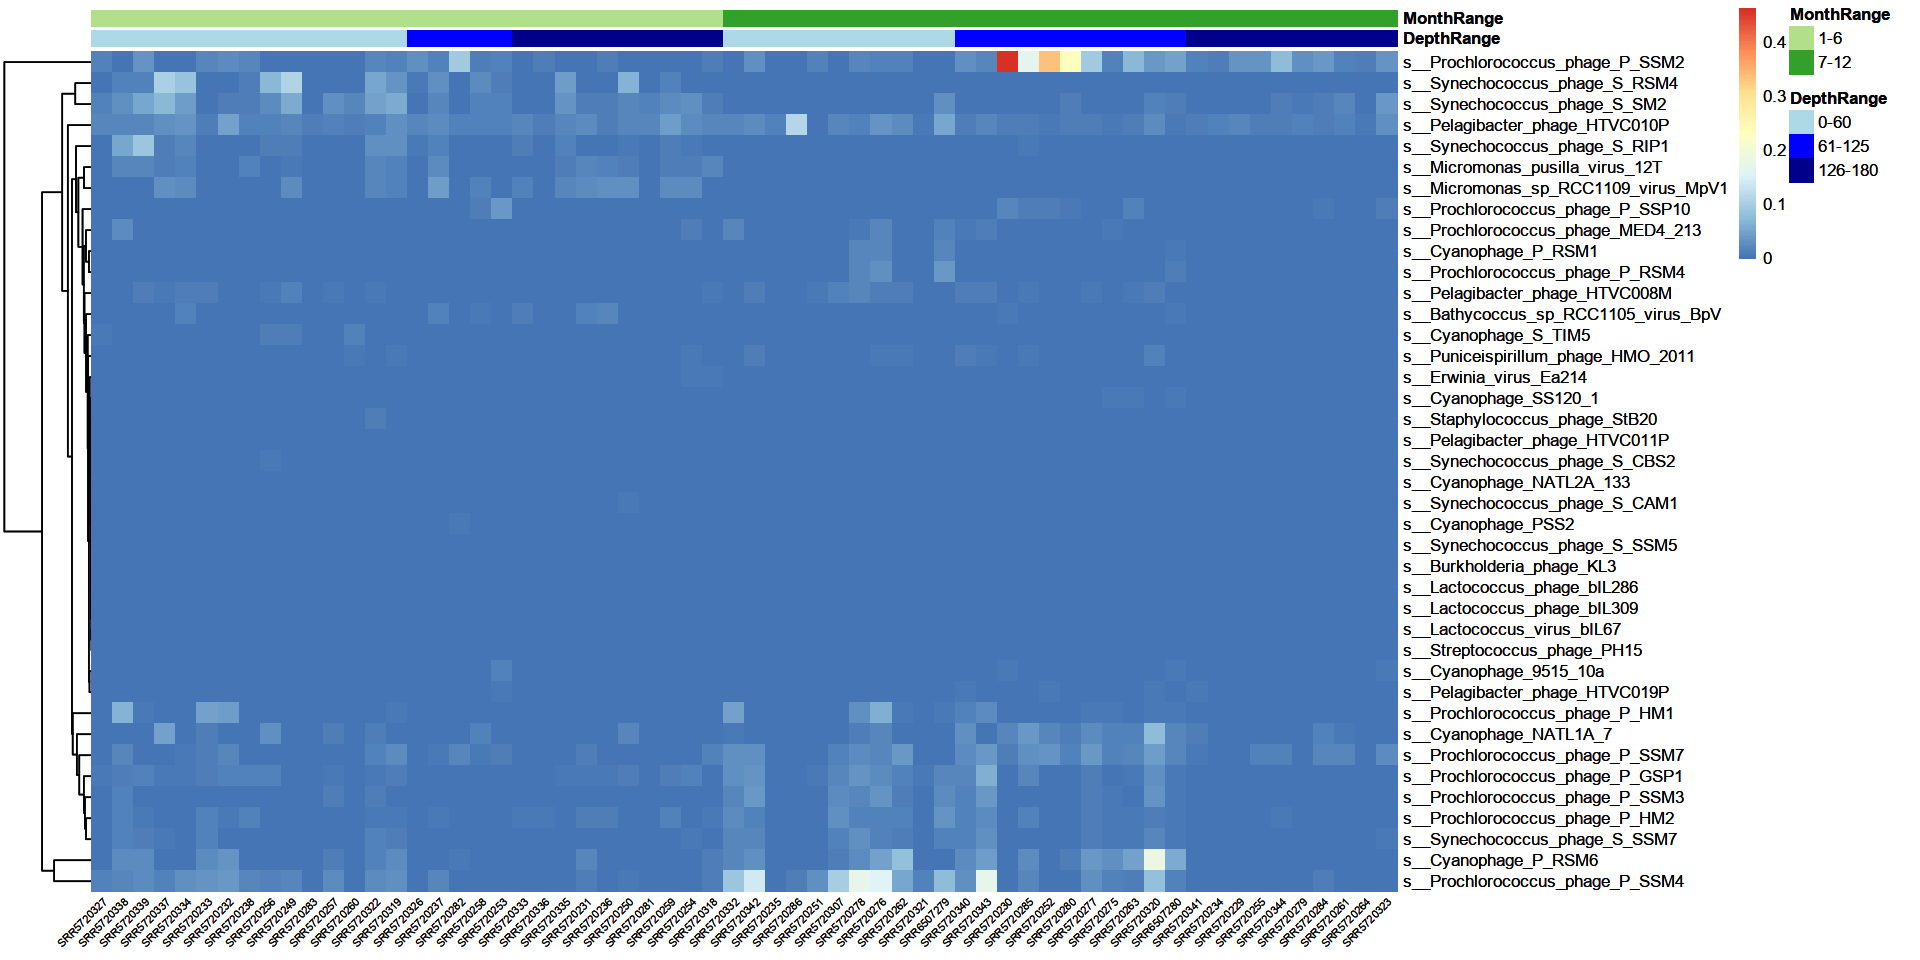

In [207]:
options(repr.plot.width=16, repr.plot.height=8)

library(pheatmap)
library("RColorBrewer")

bats_sample_meta <- BATS_metadata_df.long[, c("DepthRange", "MonthRange")]

pheat.bats <- pheatmap(t(BATS_vir_species_abund), 
         #legend_breaks = -4:4, legend_labels = paste('1e', -4:4, sep=''), 
         cluster_cols = F, 
         cluster_rows = T, 
         annotation_col = bats_sample_meta,     
         annotation_colors = list(
             DepthRange = c(`0-60` = "lightblue", `61-125` = "blue", `126-180` = "darkblue"),
             MonthRange = setNames(brewer.pal(9, "Paired")[c(3, 4)],
                             c("1-6", "7-12"))),
         fontsize_col = 6, 
         fontsize_row = 10, 
         angle_col = 45,
         cutree_rows = 1,
         show_rownames = T)

pdf("BioGEOTRACES_BATS_MetaPhlAn3_Viruses_by_Species_pheatmap.pdf", width=16, height=8)
print(pheat.bats)
dev.off()

print(pheat.bats)